numba: 0.56.3
numpy: 1.21.5
pandas: 1.4.4
ccxt: 1.62.81


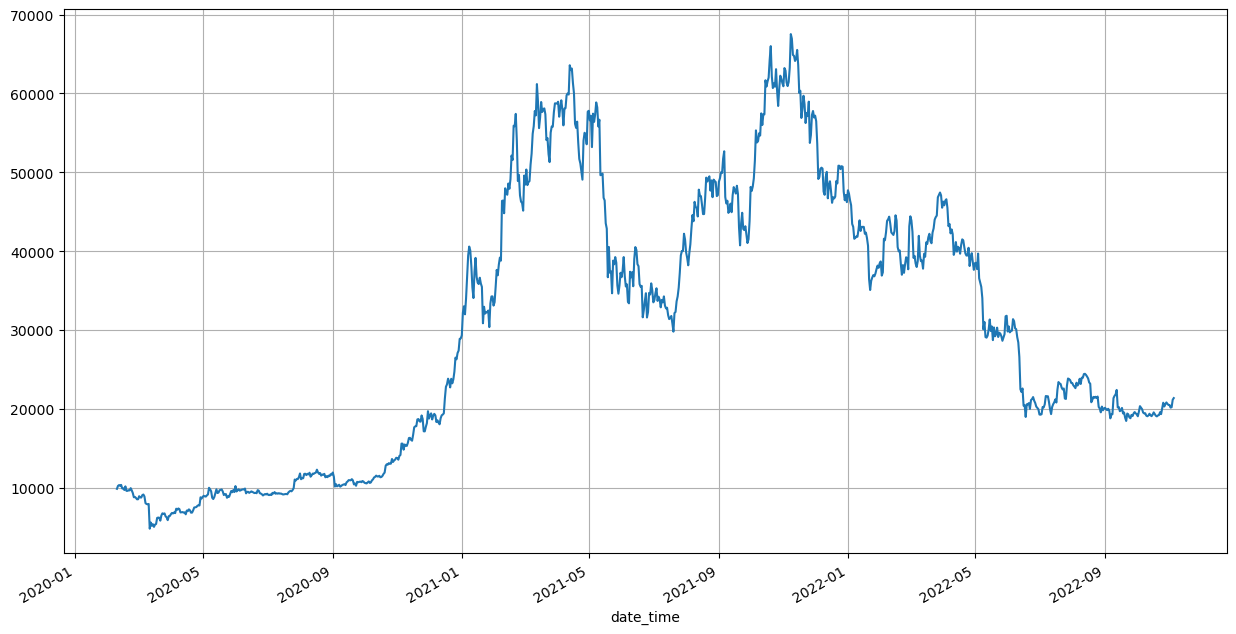

In [25]:
import ccxt
import pprint
import datetime
import numba
import numpy
import pandas as pd

print("numba:", numba.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pd.__version__)
print("ccxt:", ccxt.__version__)

# From timestamp to Datetime
def convert_from_ms(value):
    return datetime.datetime.fromtimestamp(value)

exchange = ccxt.binance()
markets= exchange.load_markets()

symbol='BTC/USDT'

ohlcv=exchange.fetch_ohlcv(symbol,'1d', limit=2500)
if len(ohlcv):
    df = pd.DataFrame(ohlcv, columns=['timestamp','open','high','low','close','volume'])
    df['date_time']=(df['timestamp']/1000).apply(convert_from_ms)
    df.index = df['date_time']
    df.drop('date_time', axis=1, inplace=True)
    df.drop('timestamp', axis=1, inplace=True)
    df.dropna()
    df.close.plot(figsize = [15,8]).grid()
else:
    print("NO DATA RECEIVED")


In [10]:
%run ./engine_gandalf_wintermute.py

In [11]:
%run ./functions_gandalf_wintermute.py

5.9.0


In [88]:
df['high_media']=df.high.rolling(3).mean()
df['low_media']=df.low.rolling(3).mean()
period_sma=7
df["daily_close_sma"] = df.close.rolling(period_sma).mean()



Elaboration starting at: 2022-11-05 03:17:35.081684
Elaboration completed at: 2022-11-05 03:17:35.082735 in 0:00:00.001051

Consistency check: entries: 23 exits: 23

*****************************************************************************************
*** Performance Report - by Gandalf Project R&D - Version Wintermute - Copyright 2022 ***
*****************************************************************************************

CAGR:                     21.37 (capital = 10000)
Annual Return:            26.26 (capital = 10000)

Calmar Ratio:             3.83 (yearly)
Sharpe Ratio:             4.96 (initial capital = 10000, risk free rate = 0.0)
Sortino Ratio:            0.75 (initial capital = 10000, risk free rate = 0.0)
Omega Ratio:              8.8 (threshold = 100)
Kestner Ratio:            0.64

Operations:               23

Profit:                   7876.61
Average Trade:            342.46

Profit Factor:            13.81
Gross Profit:             8491.43
Gross Loss:        

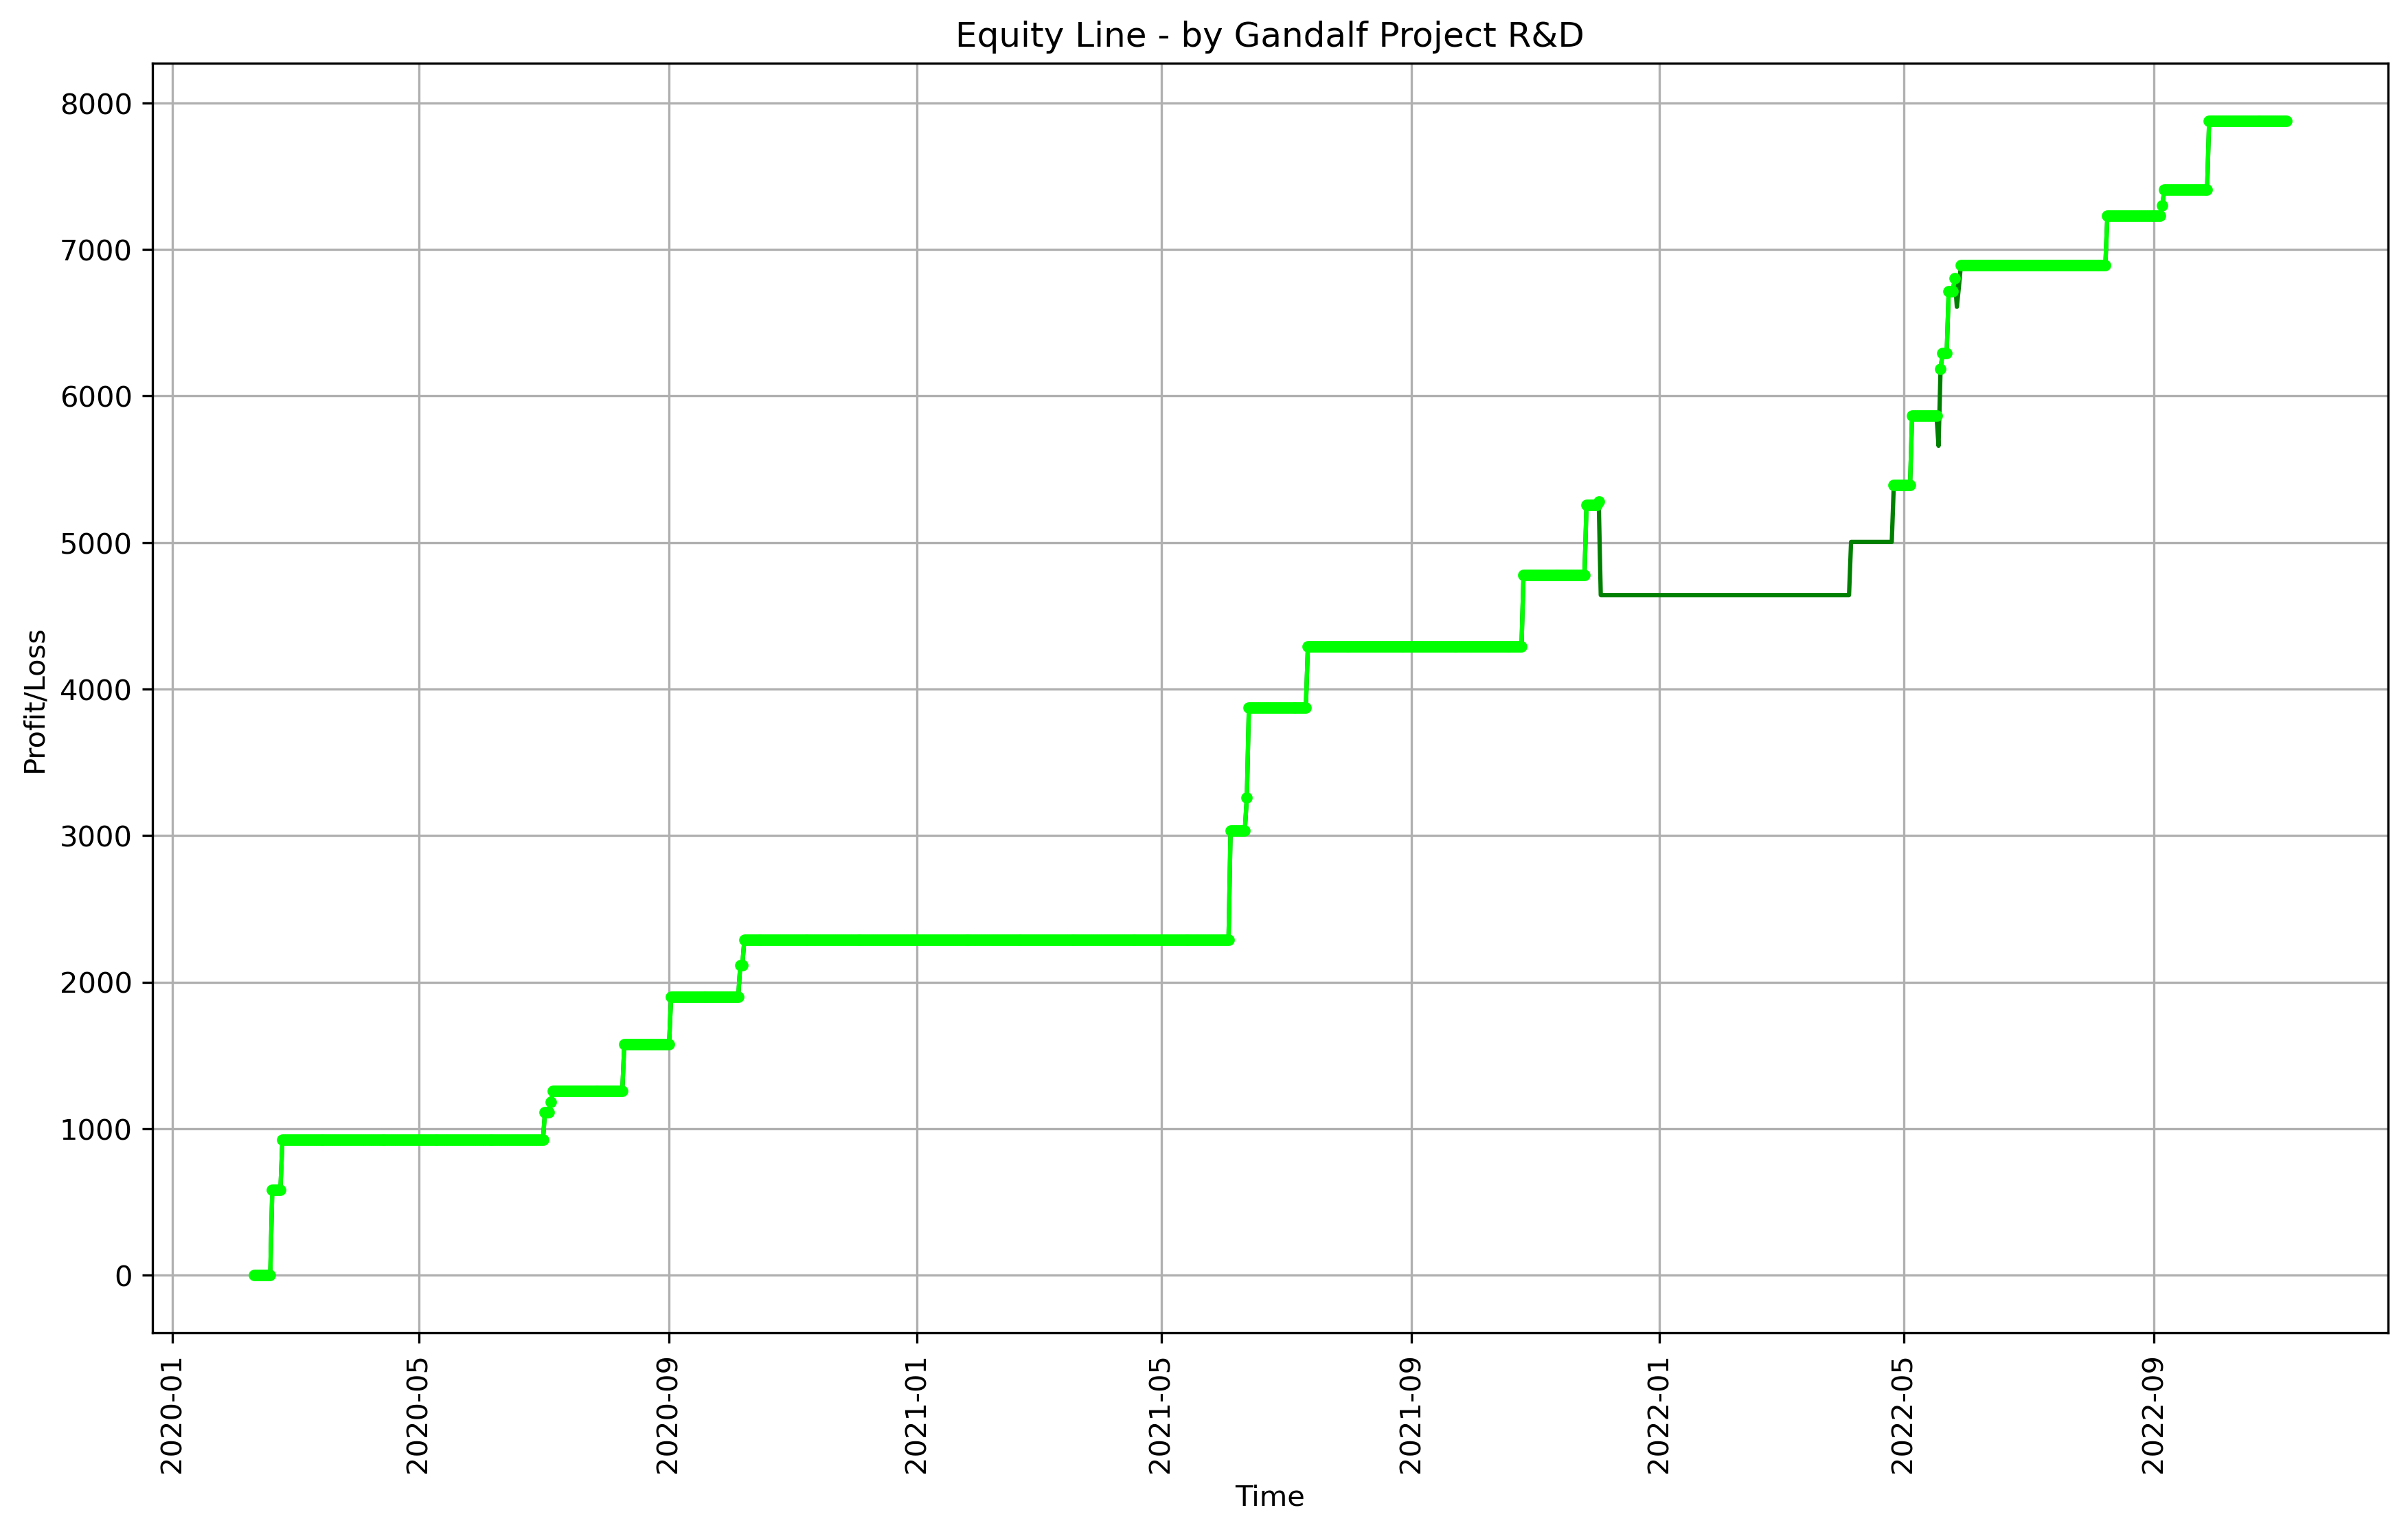

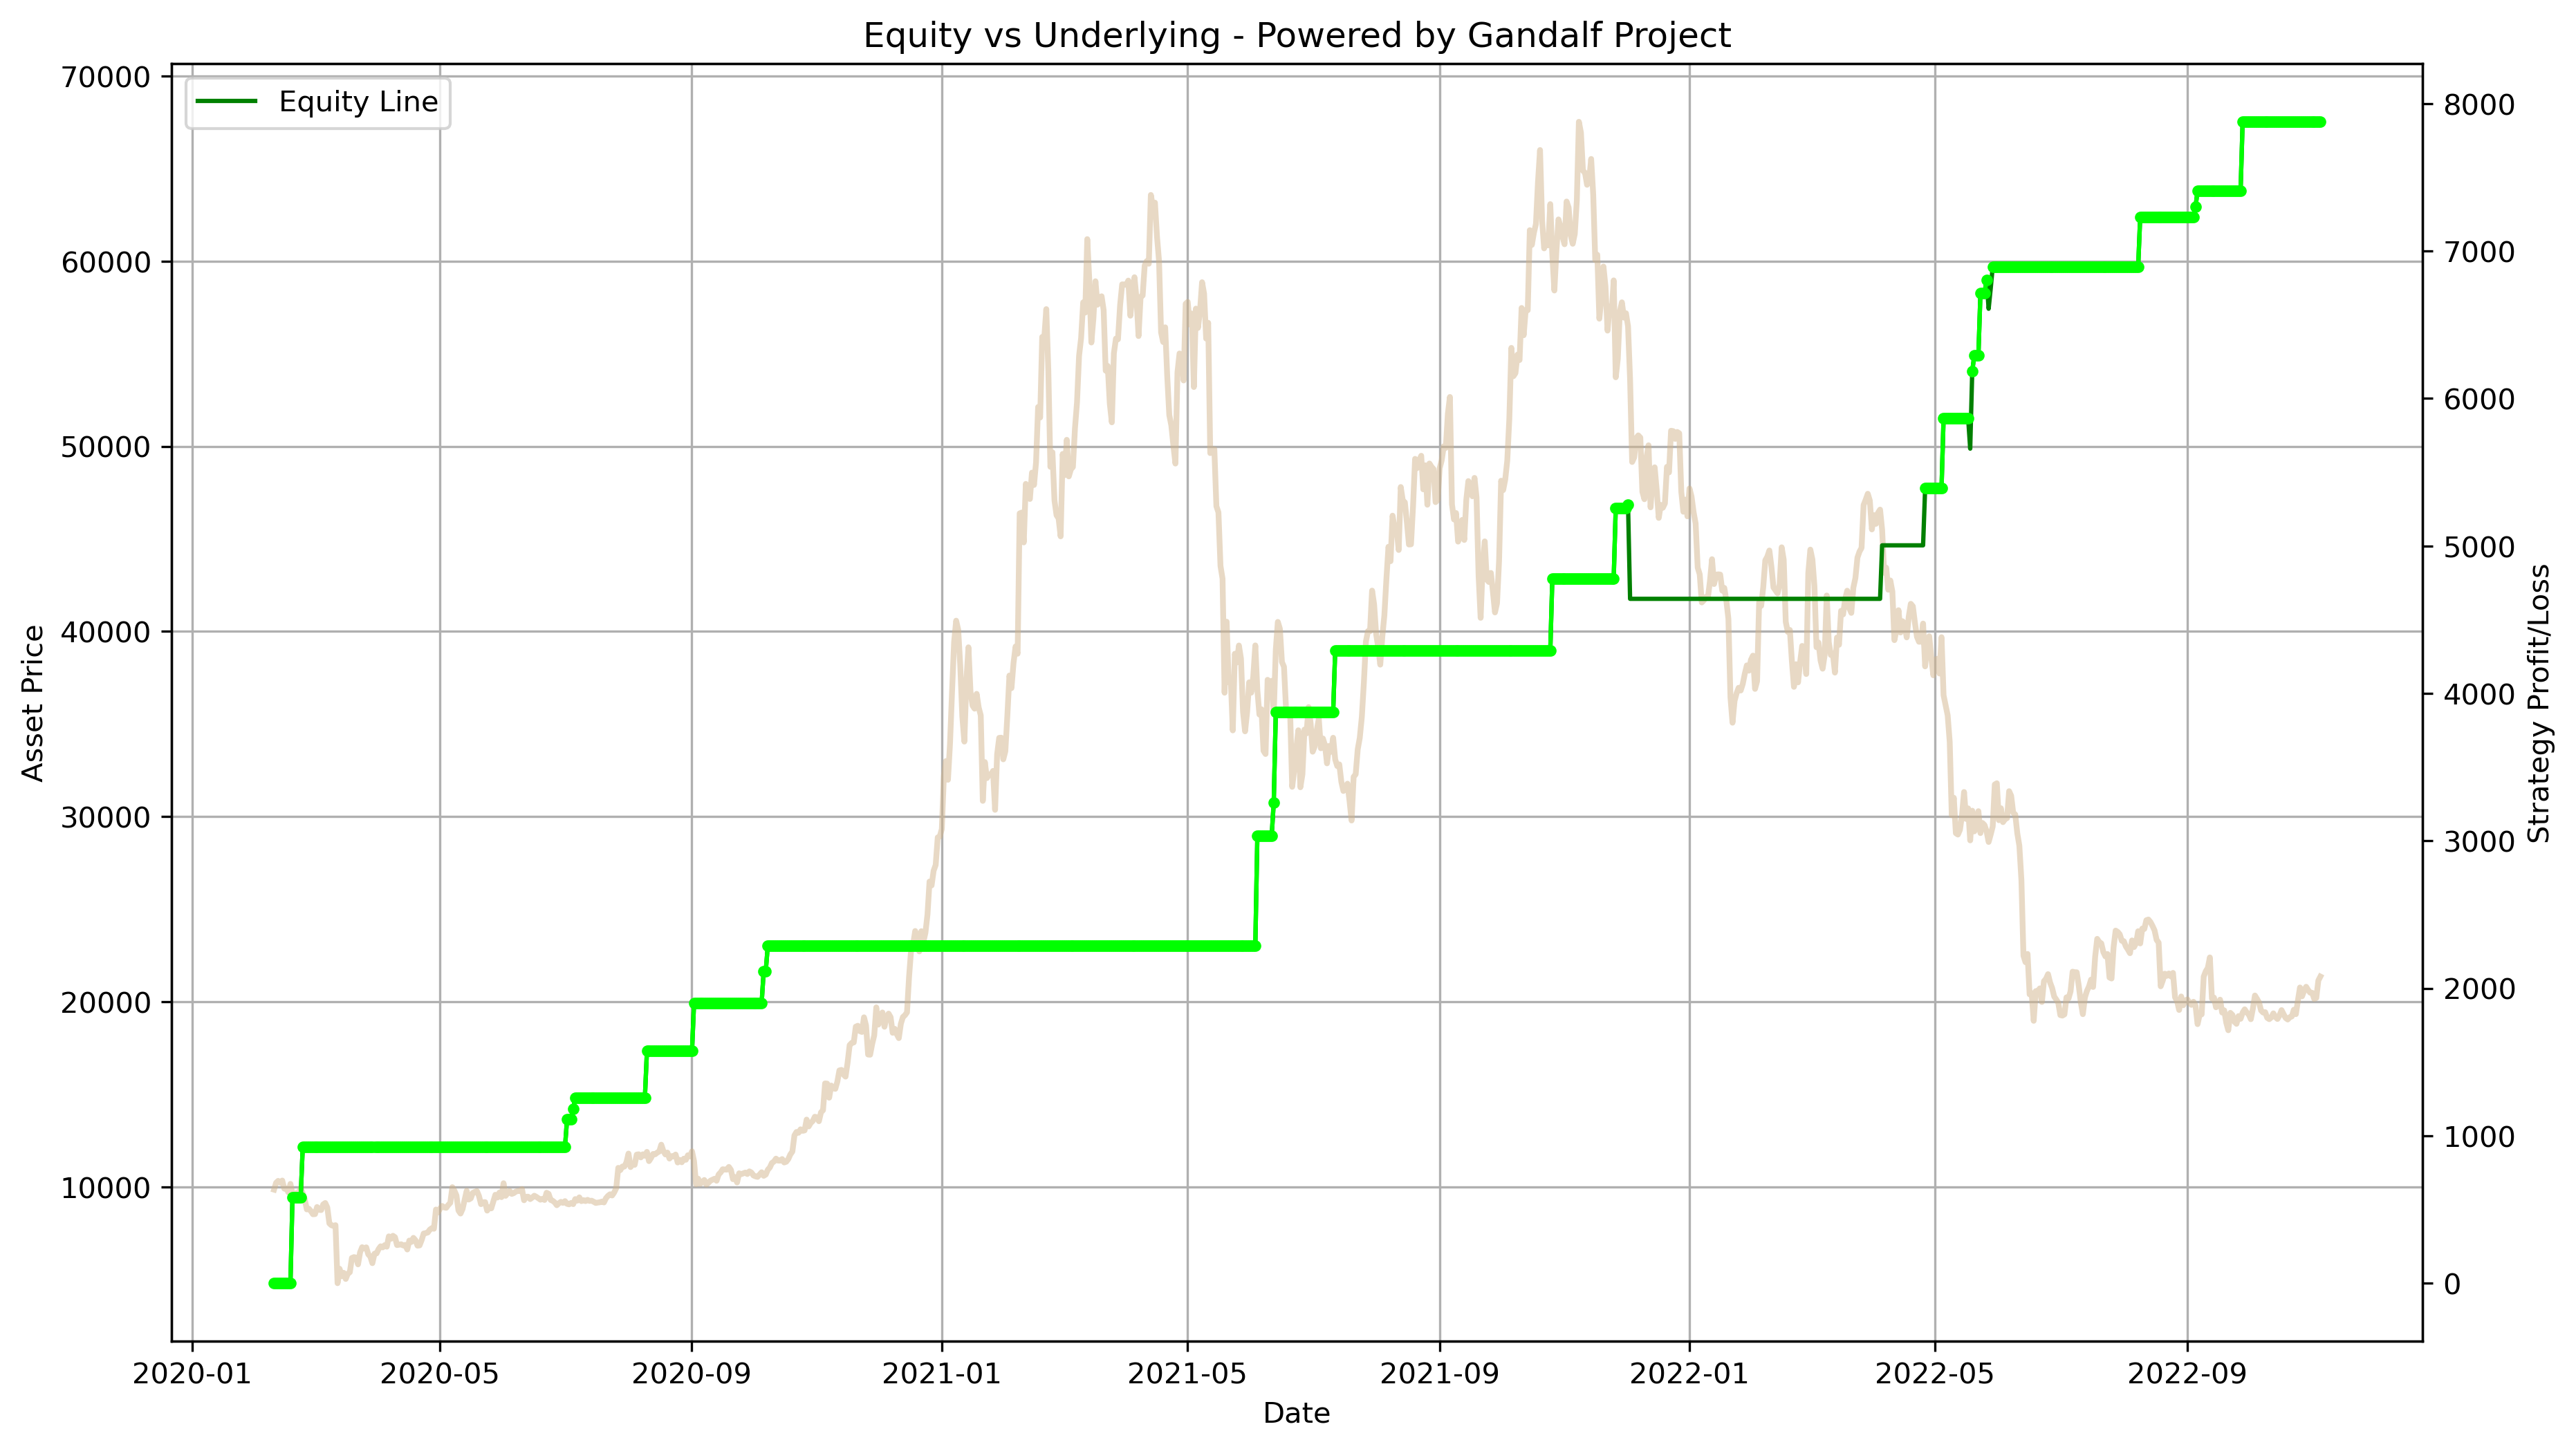

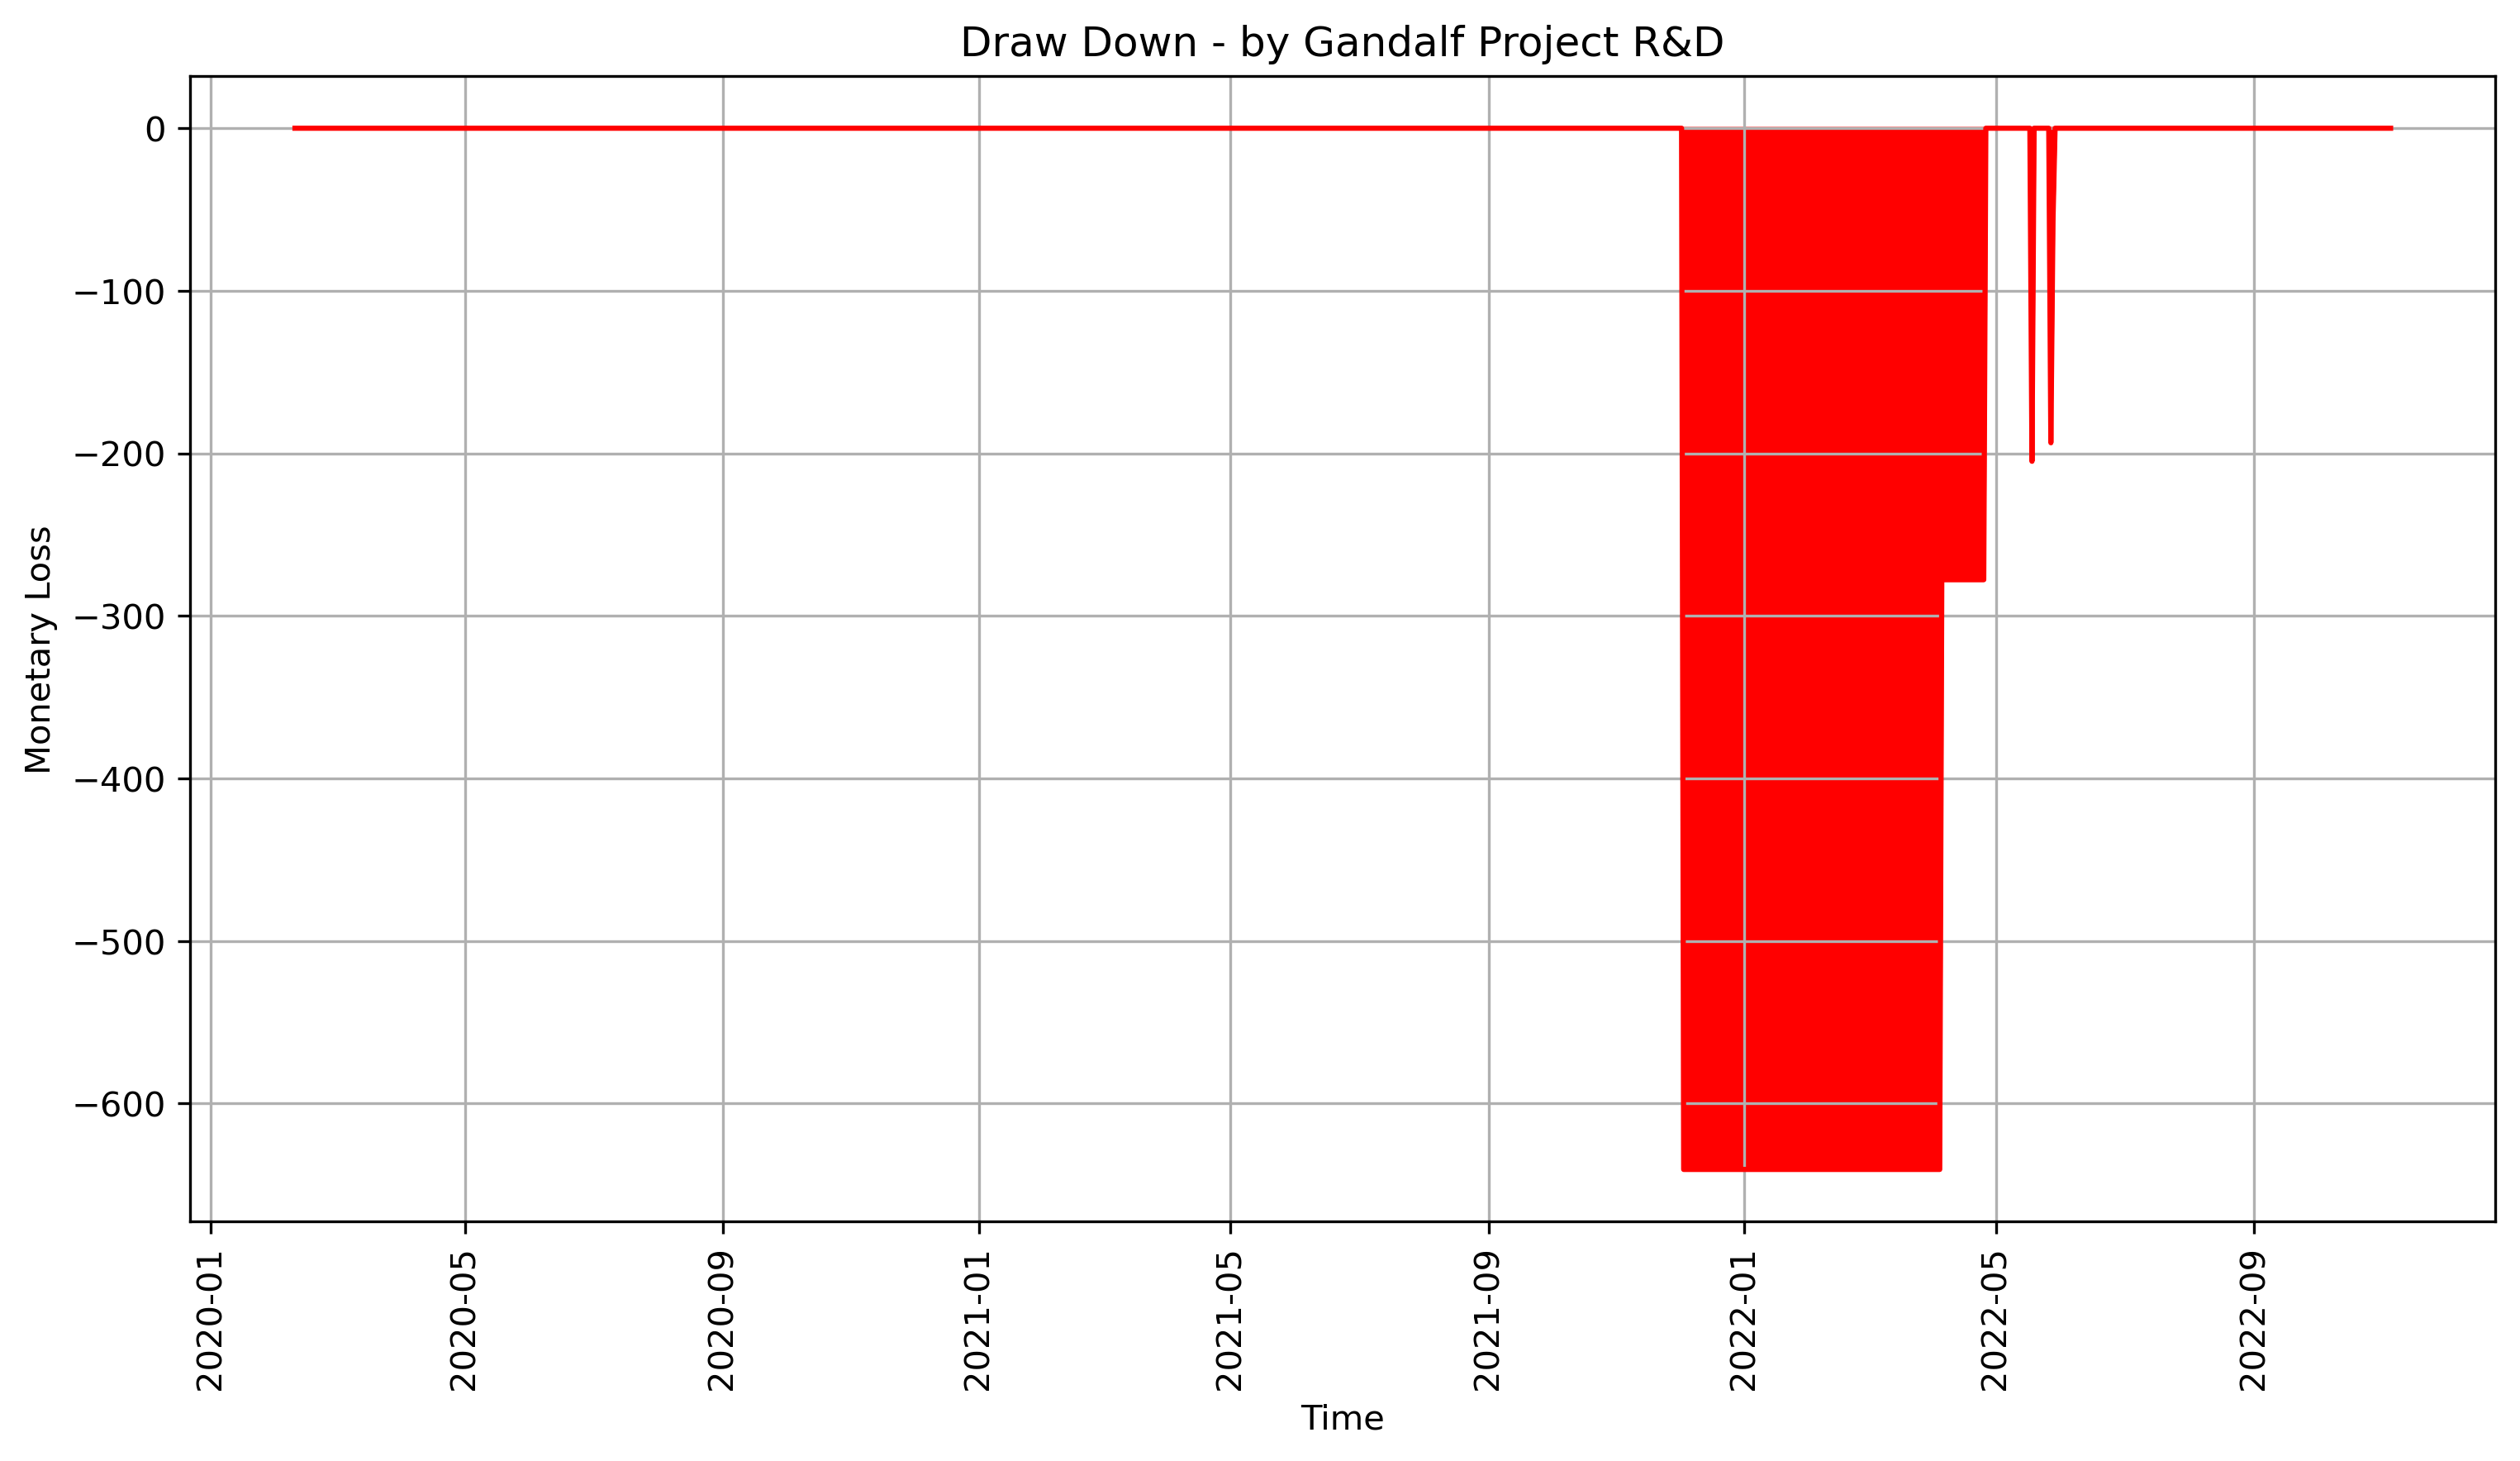

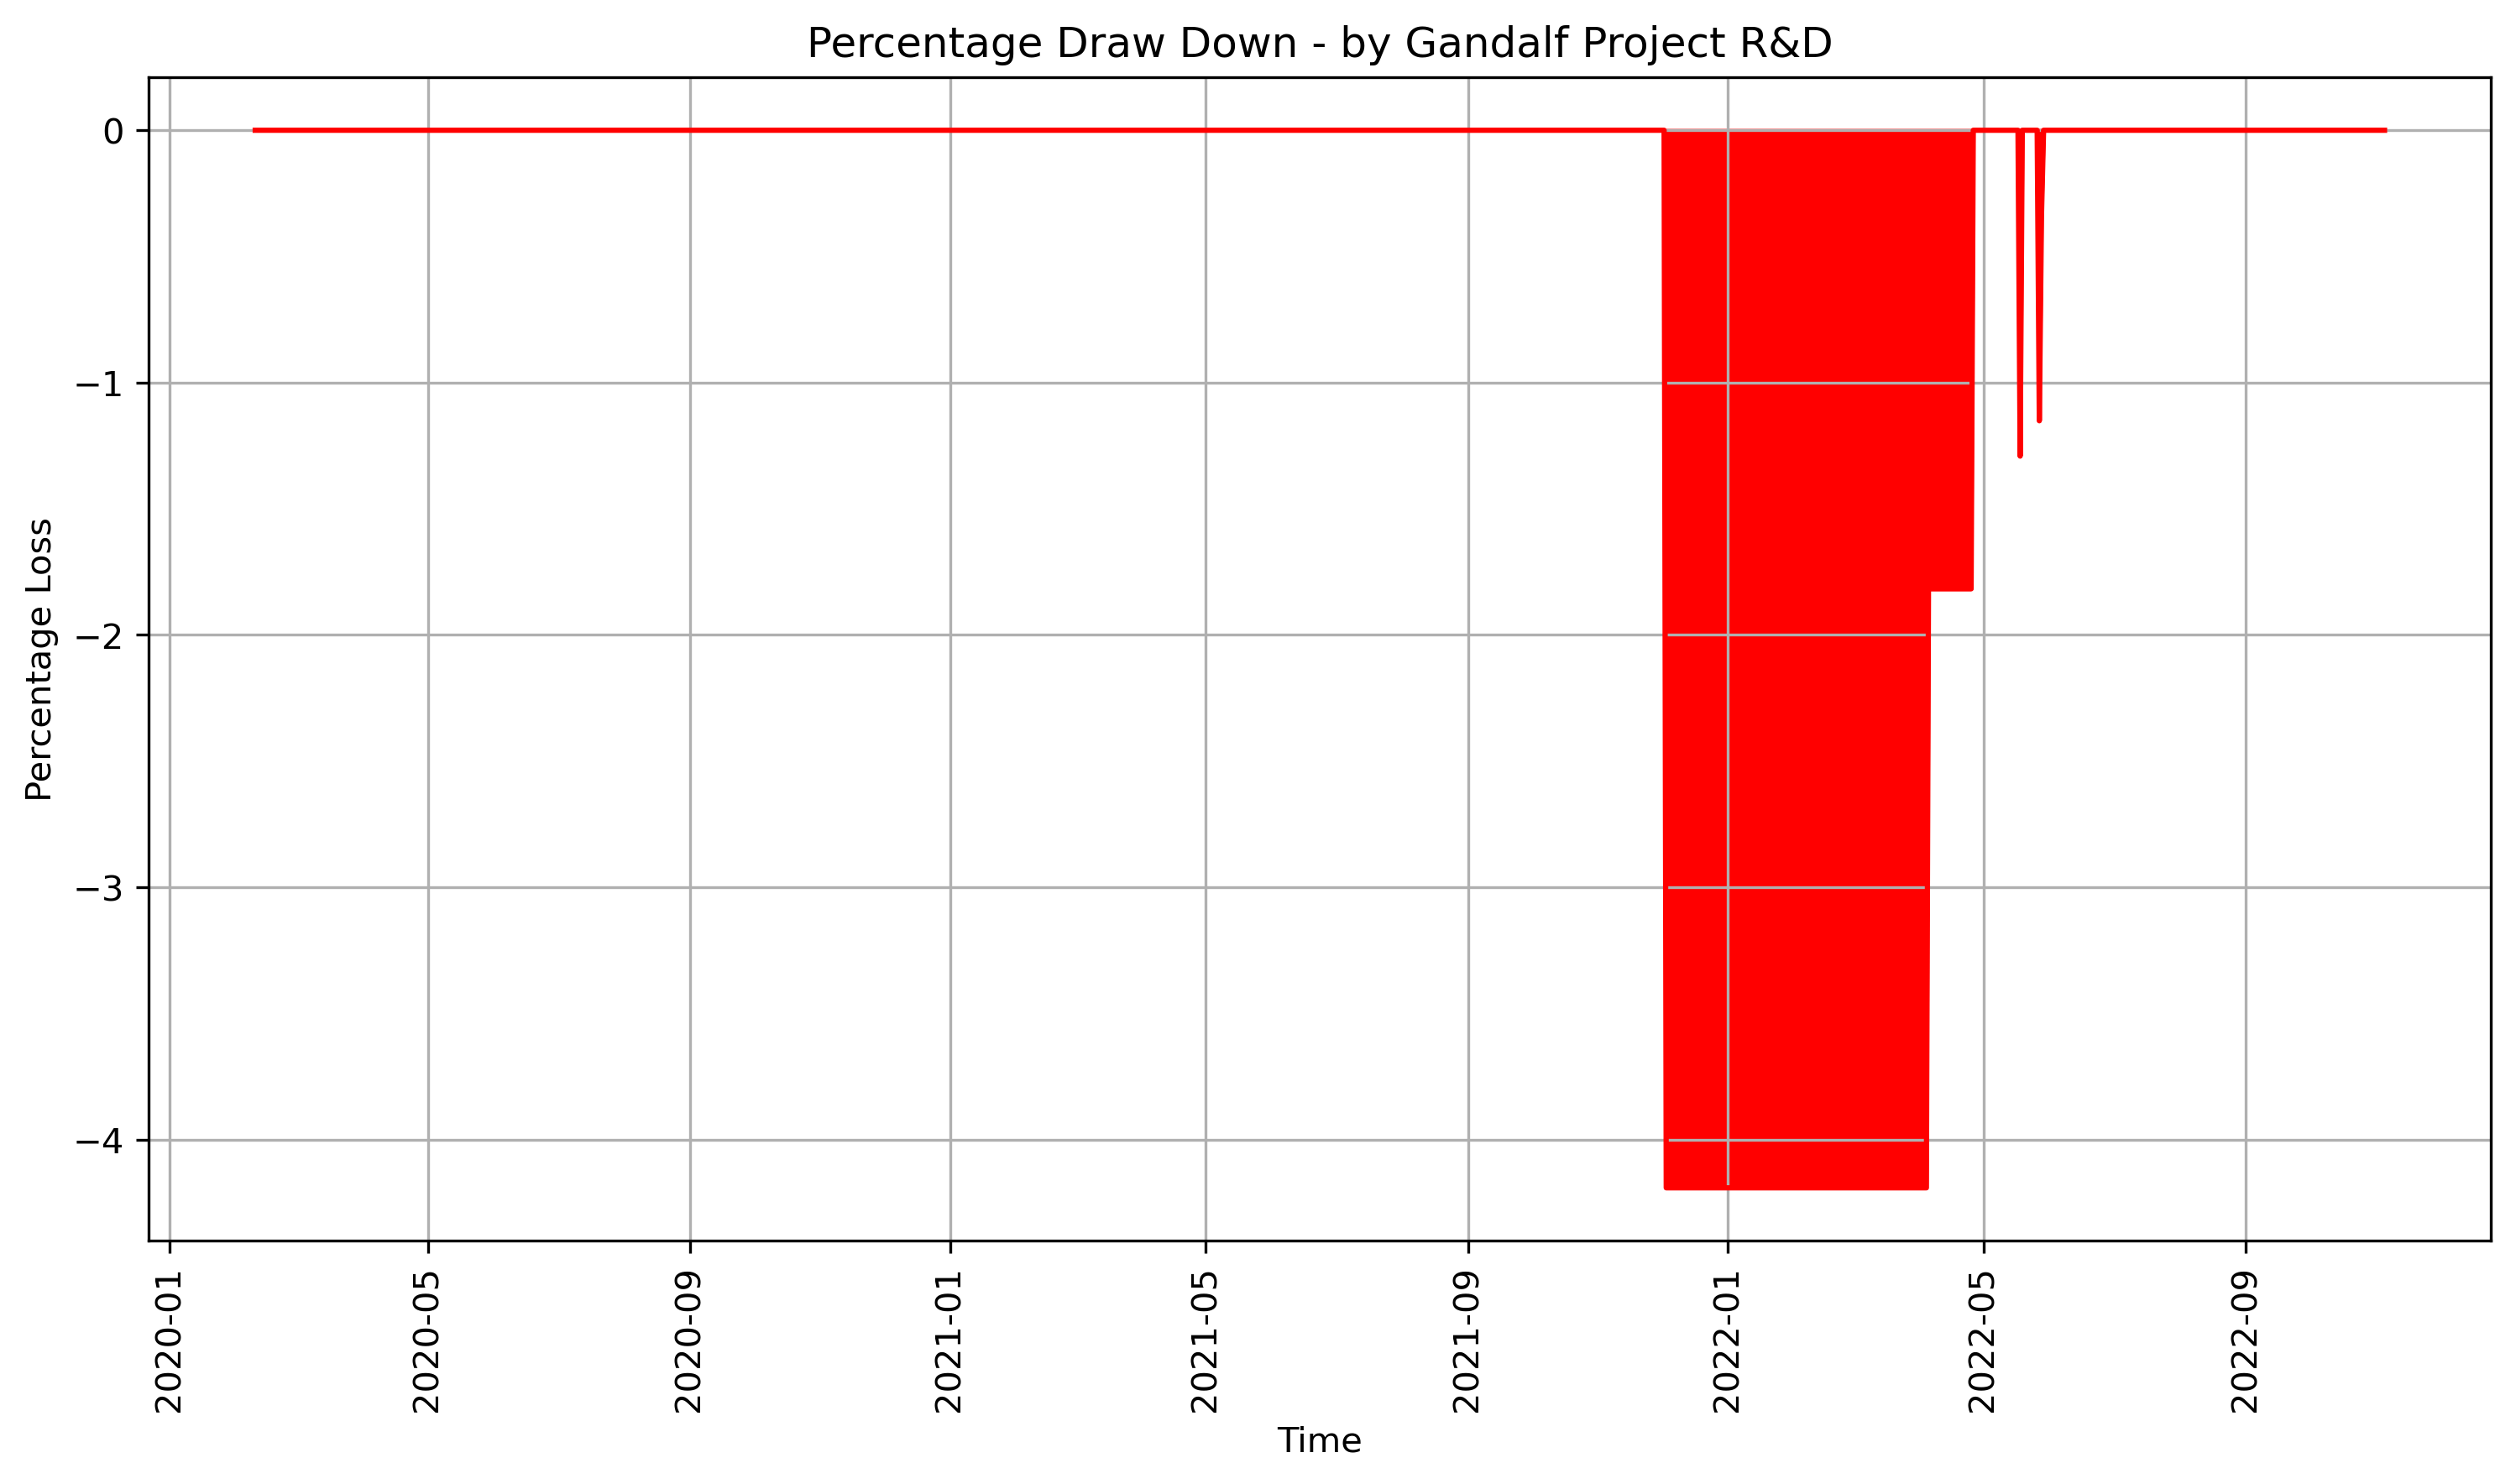

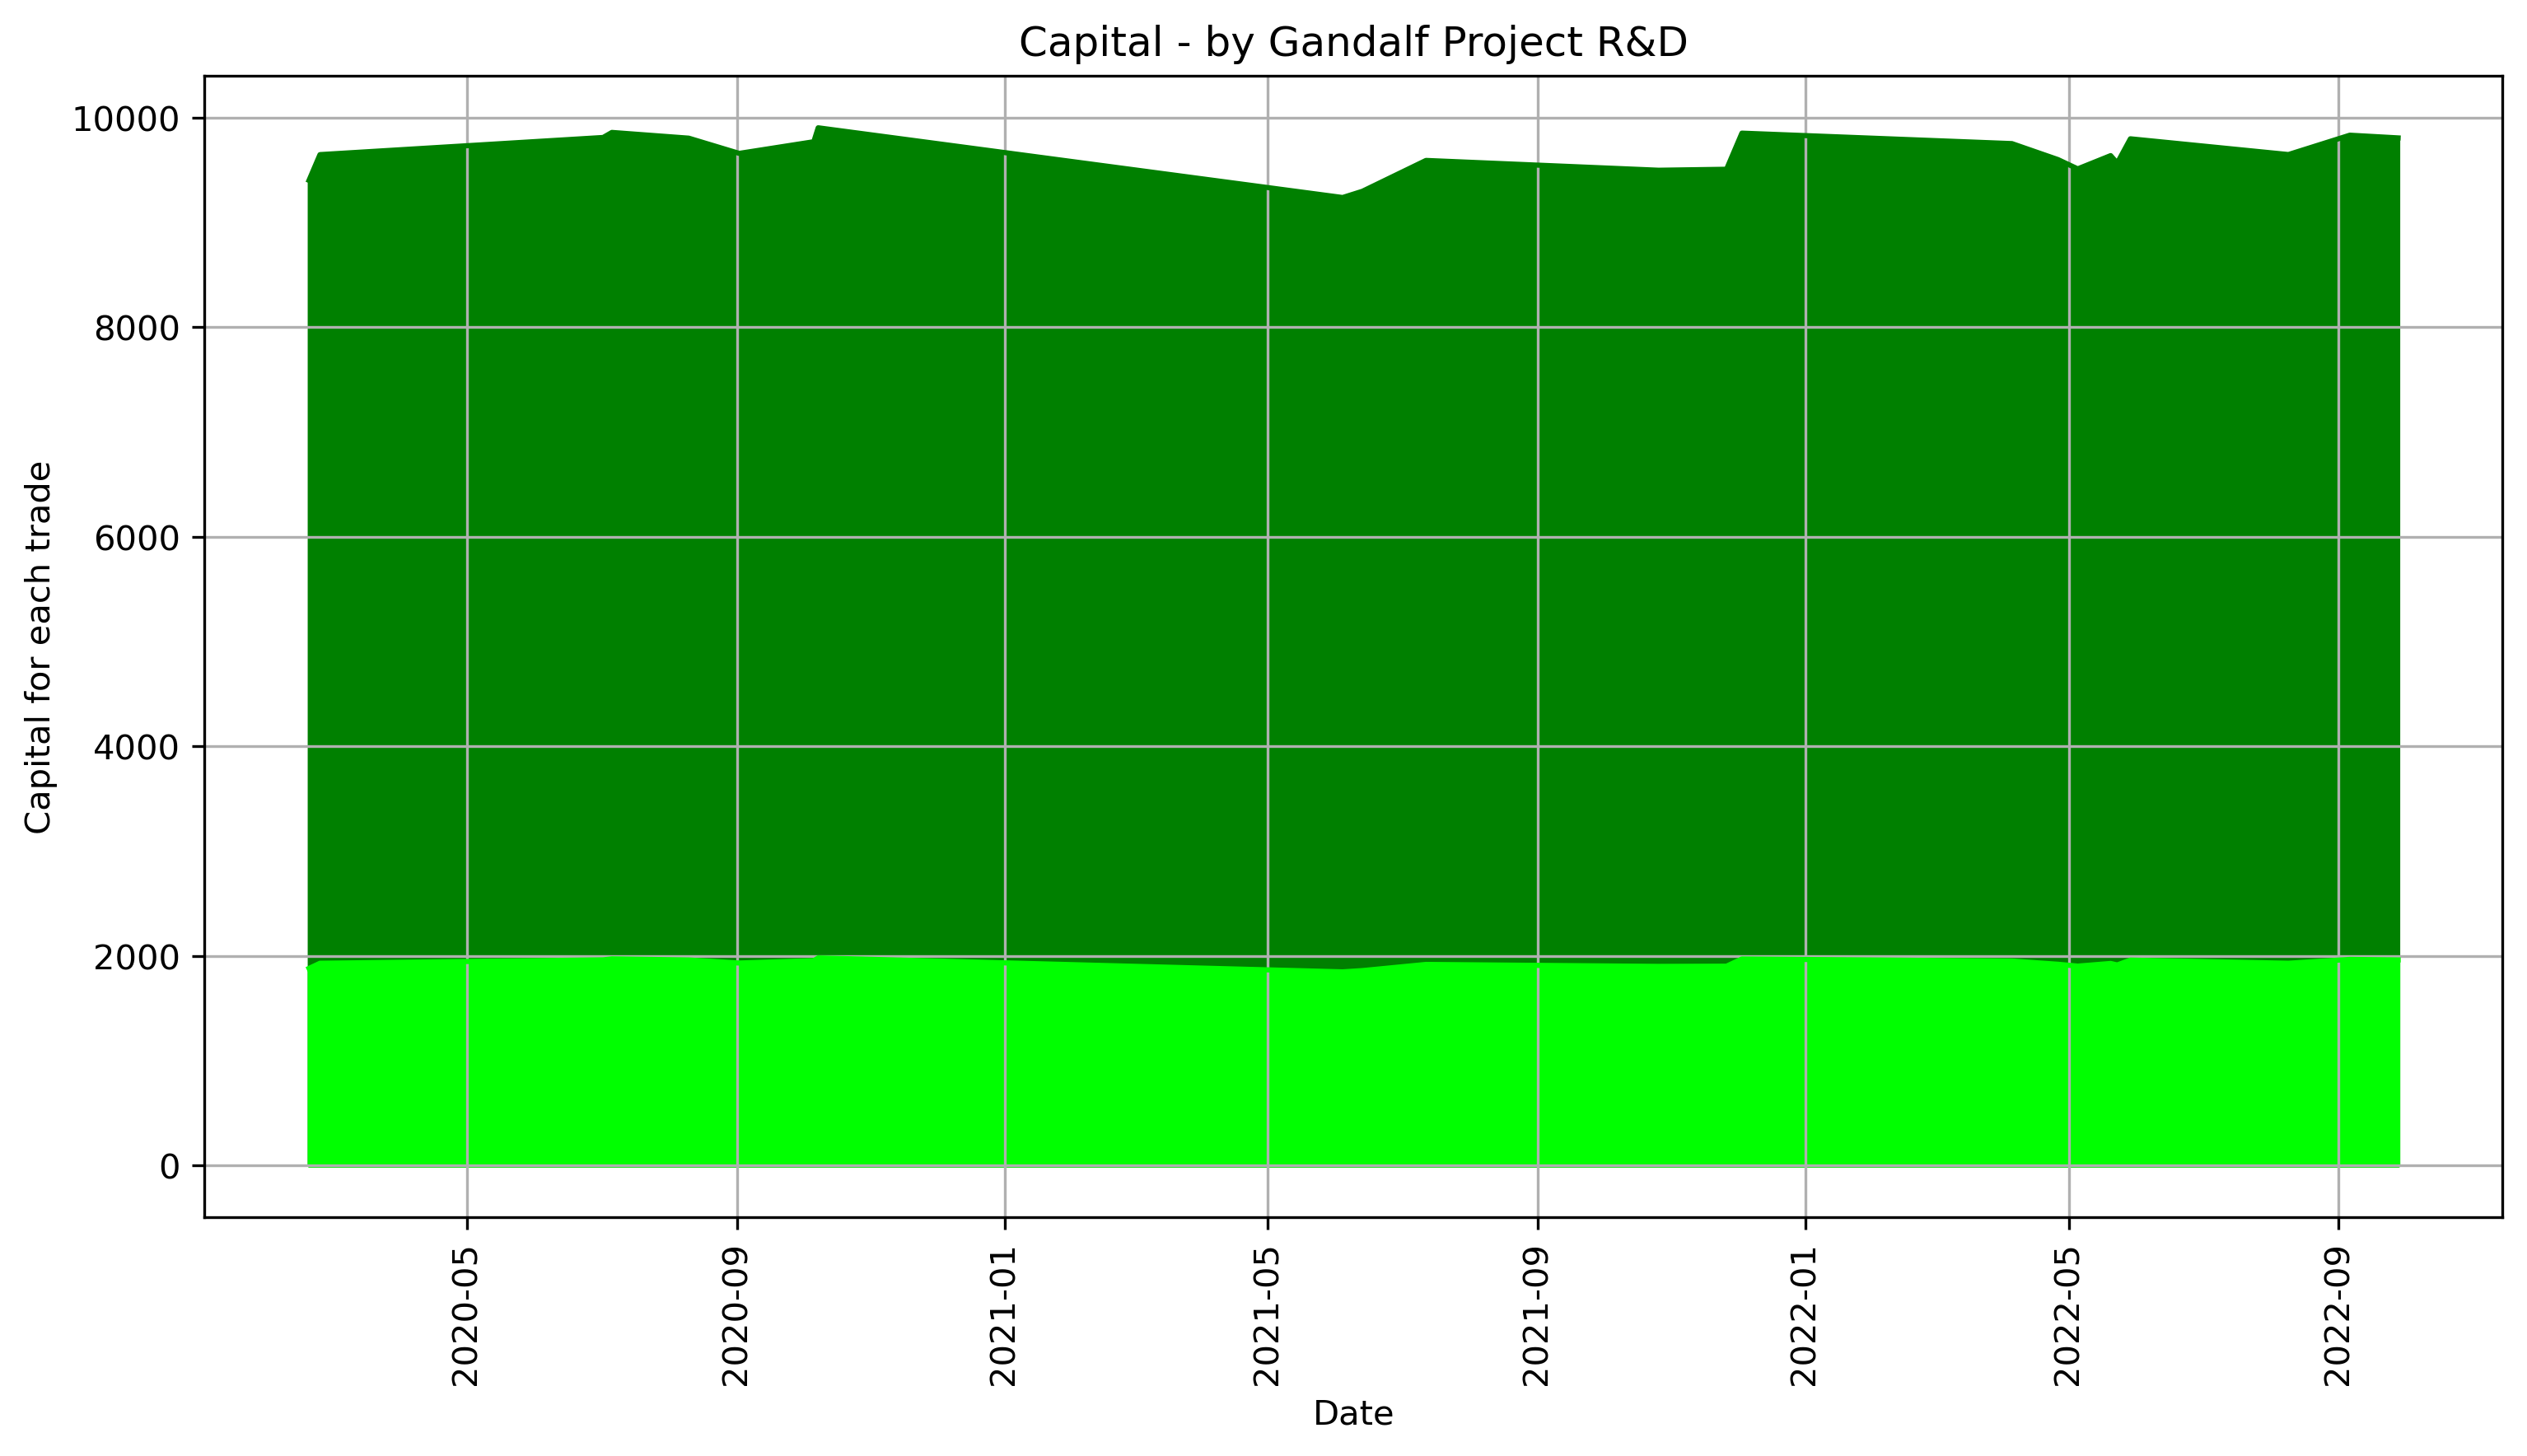

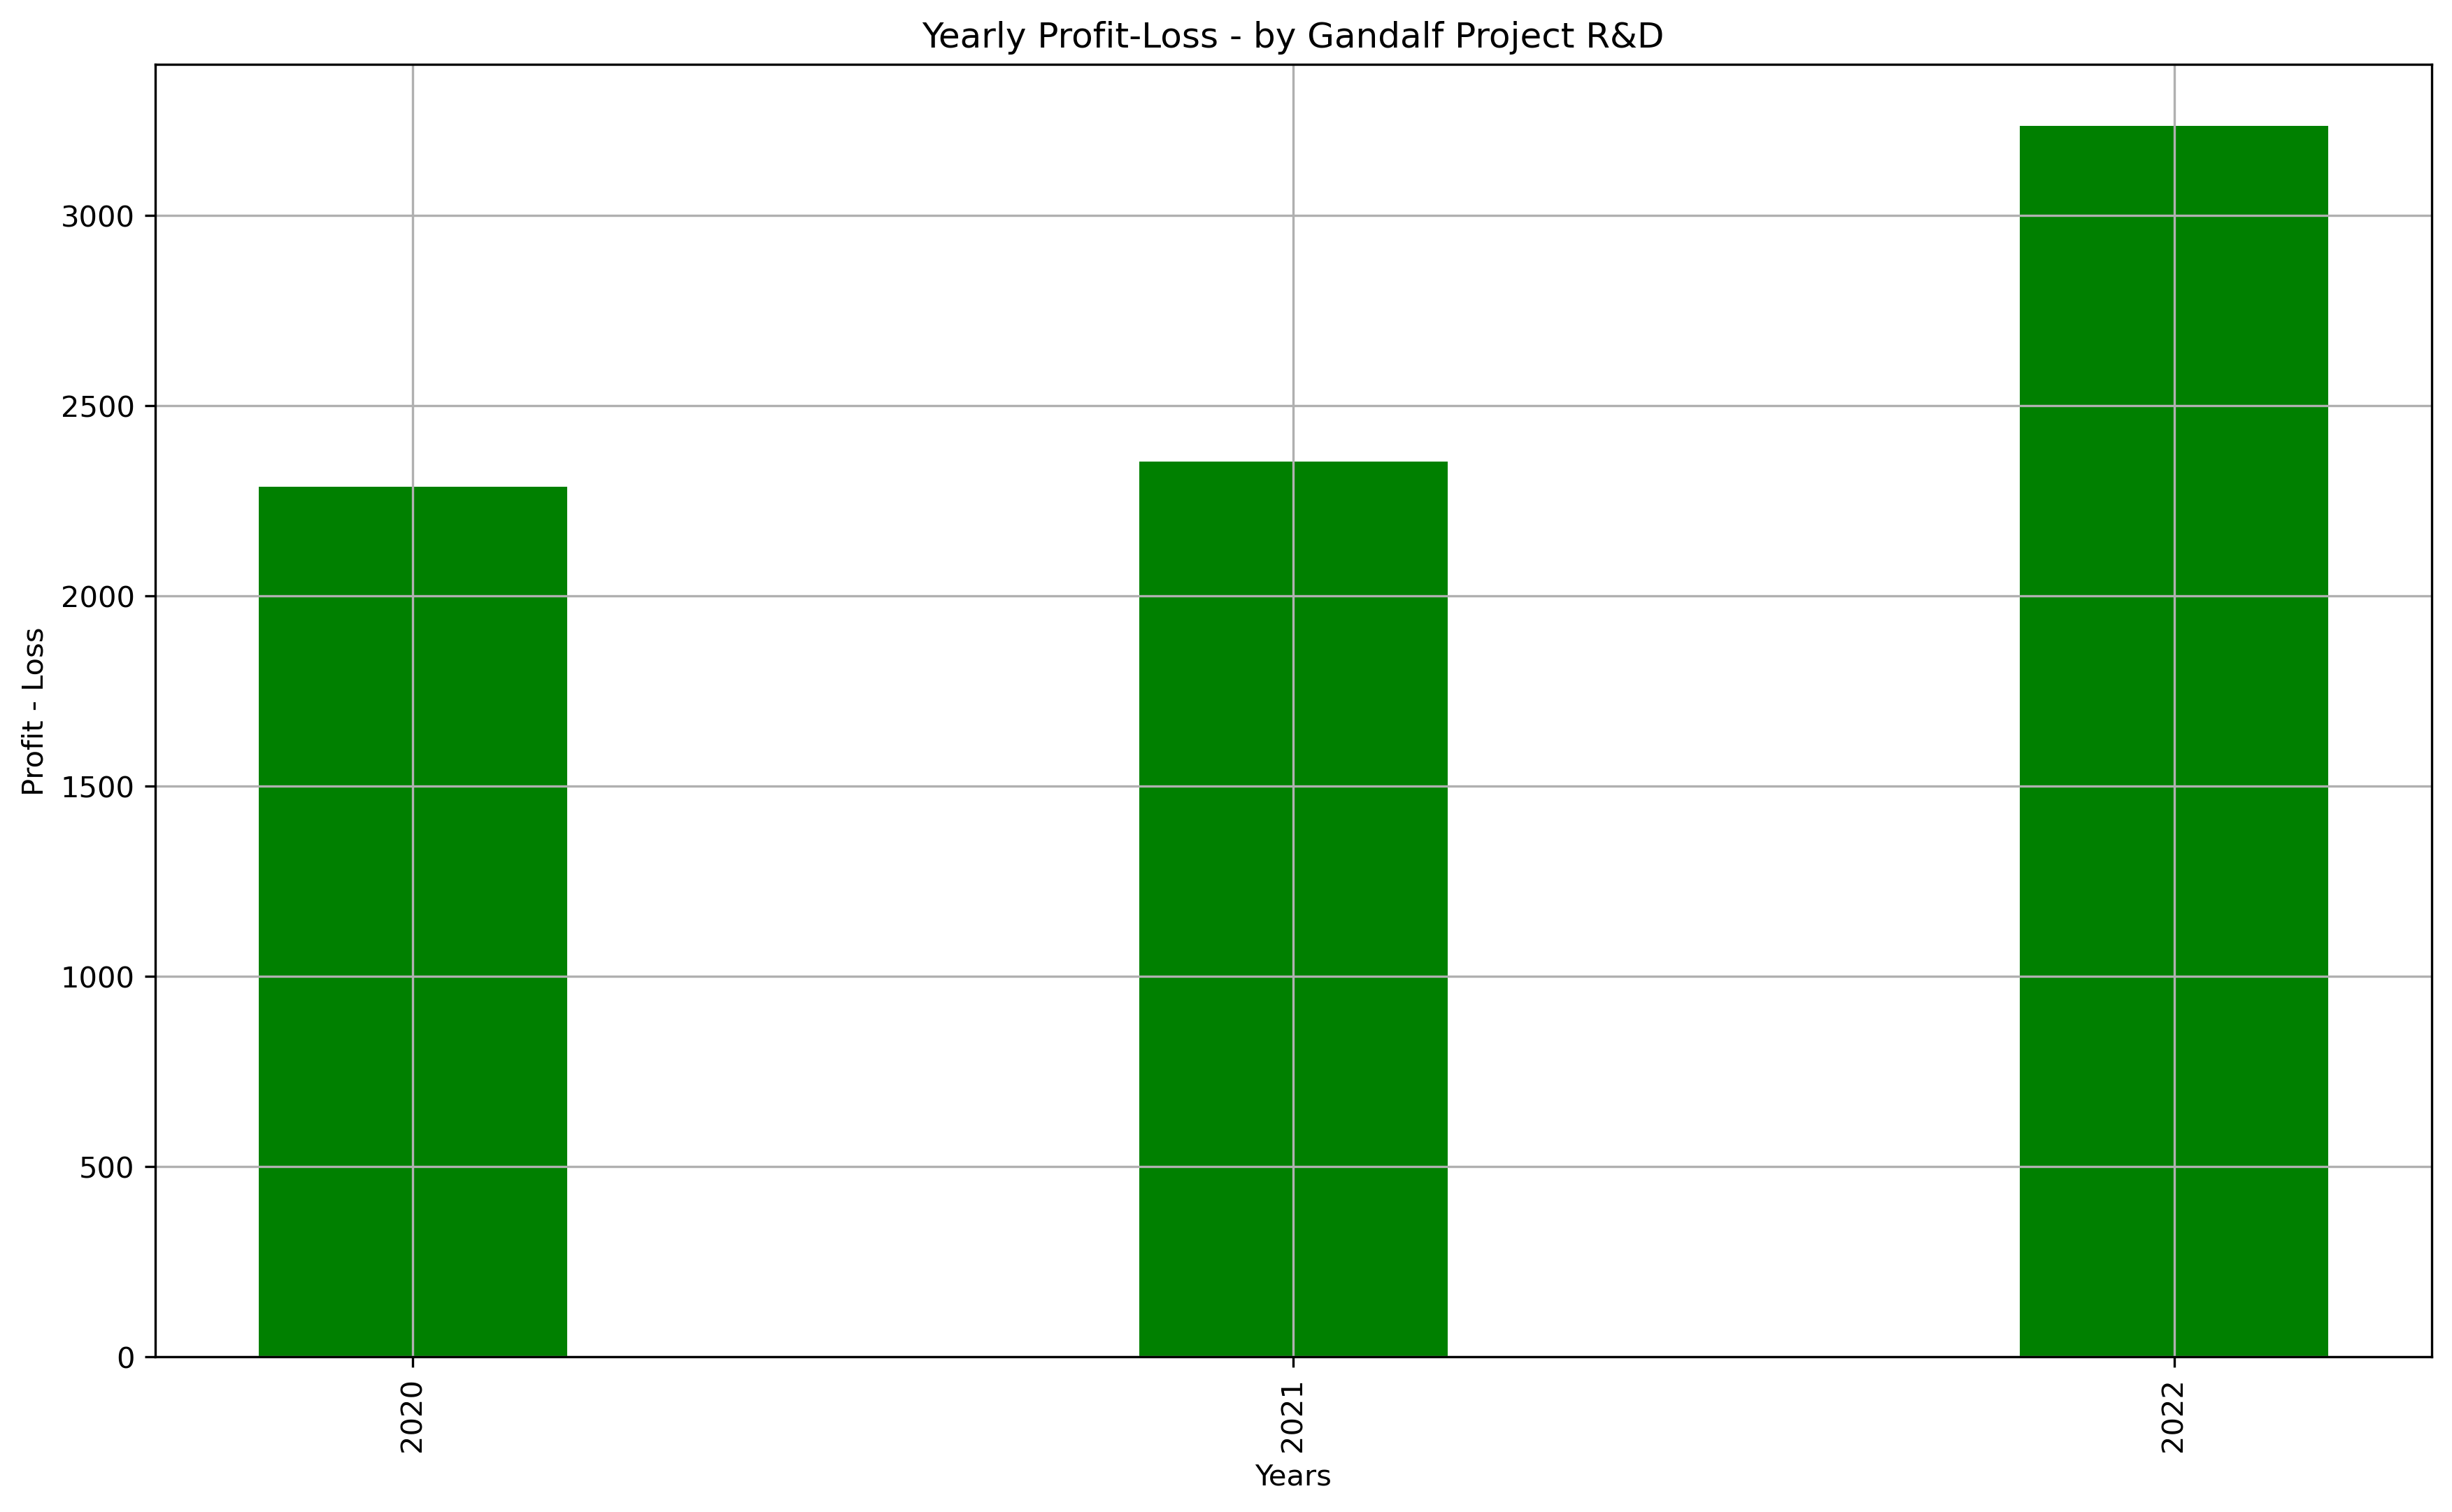

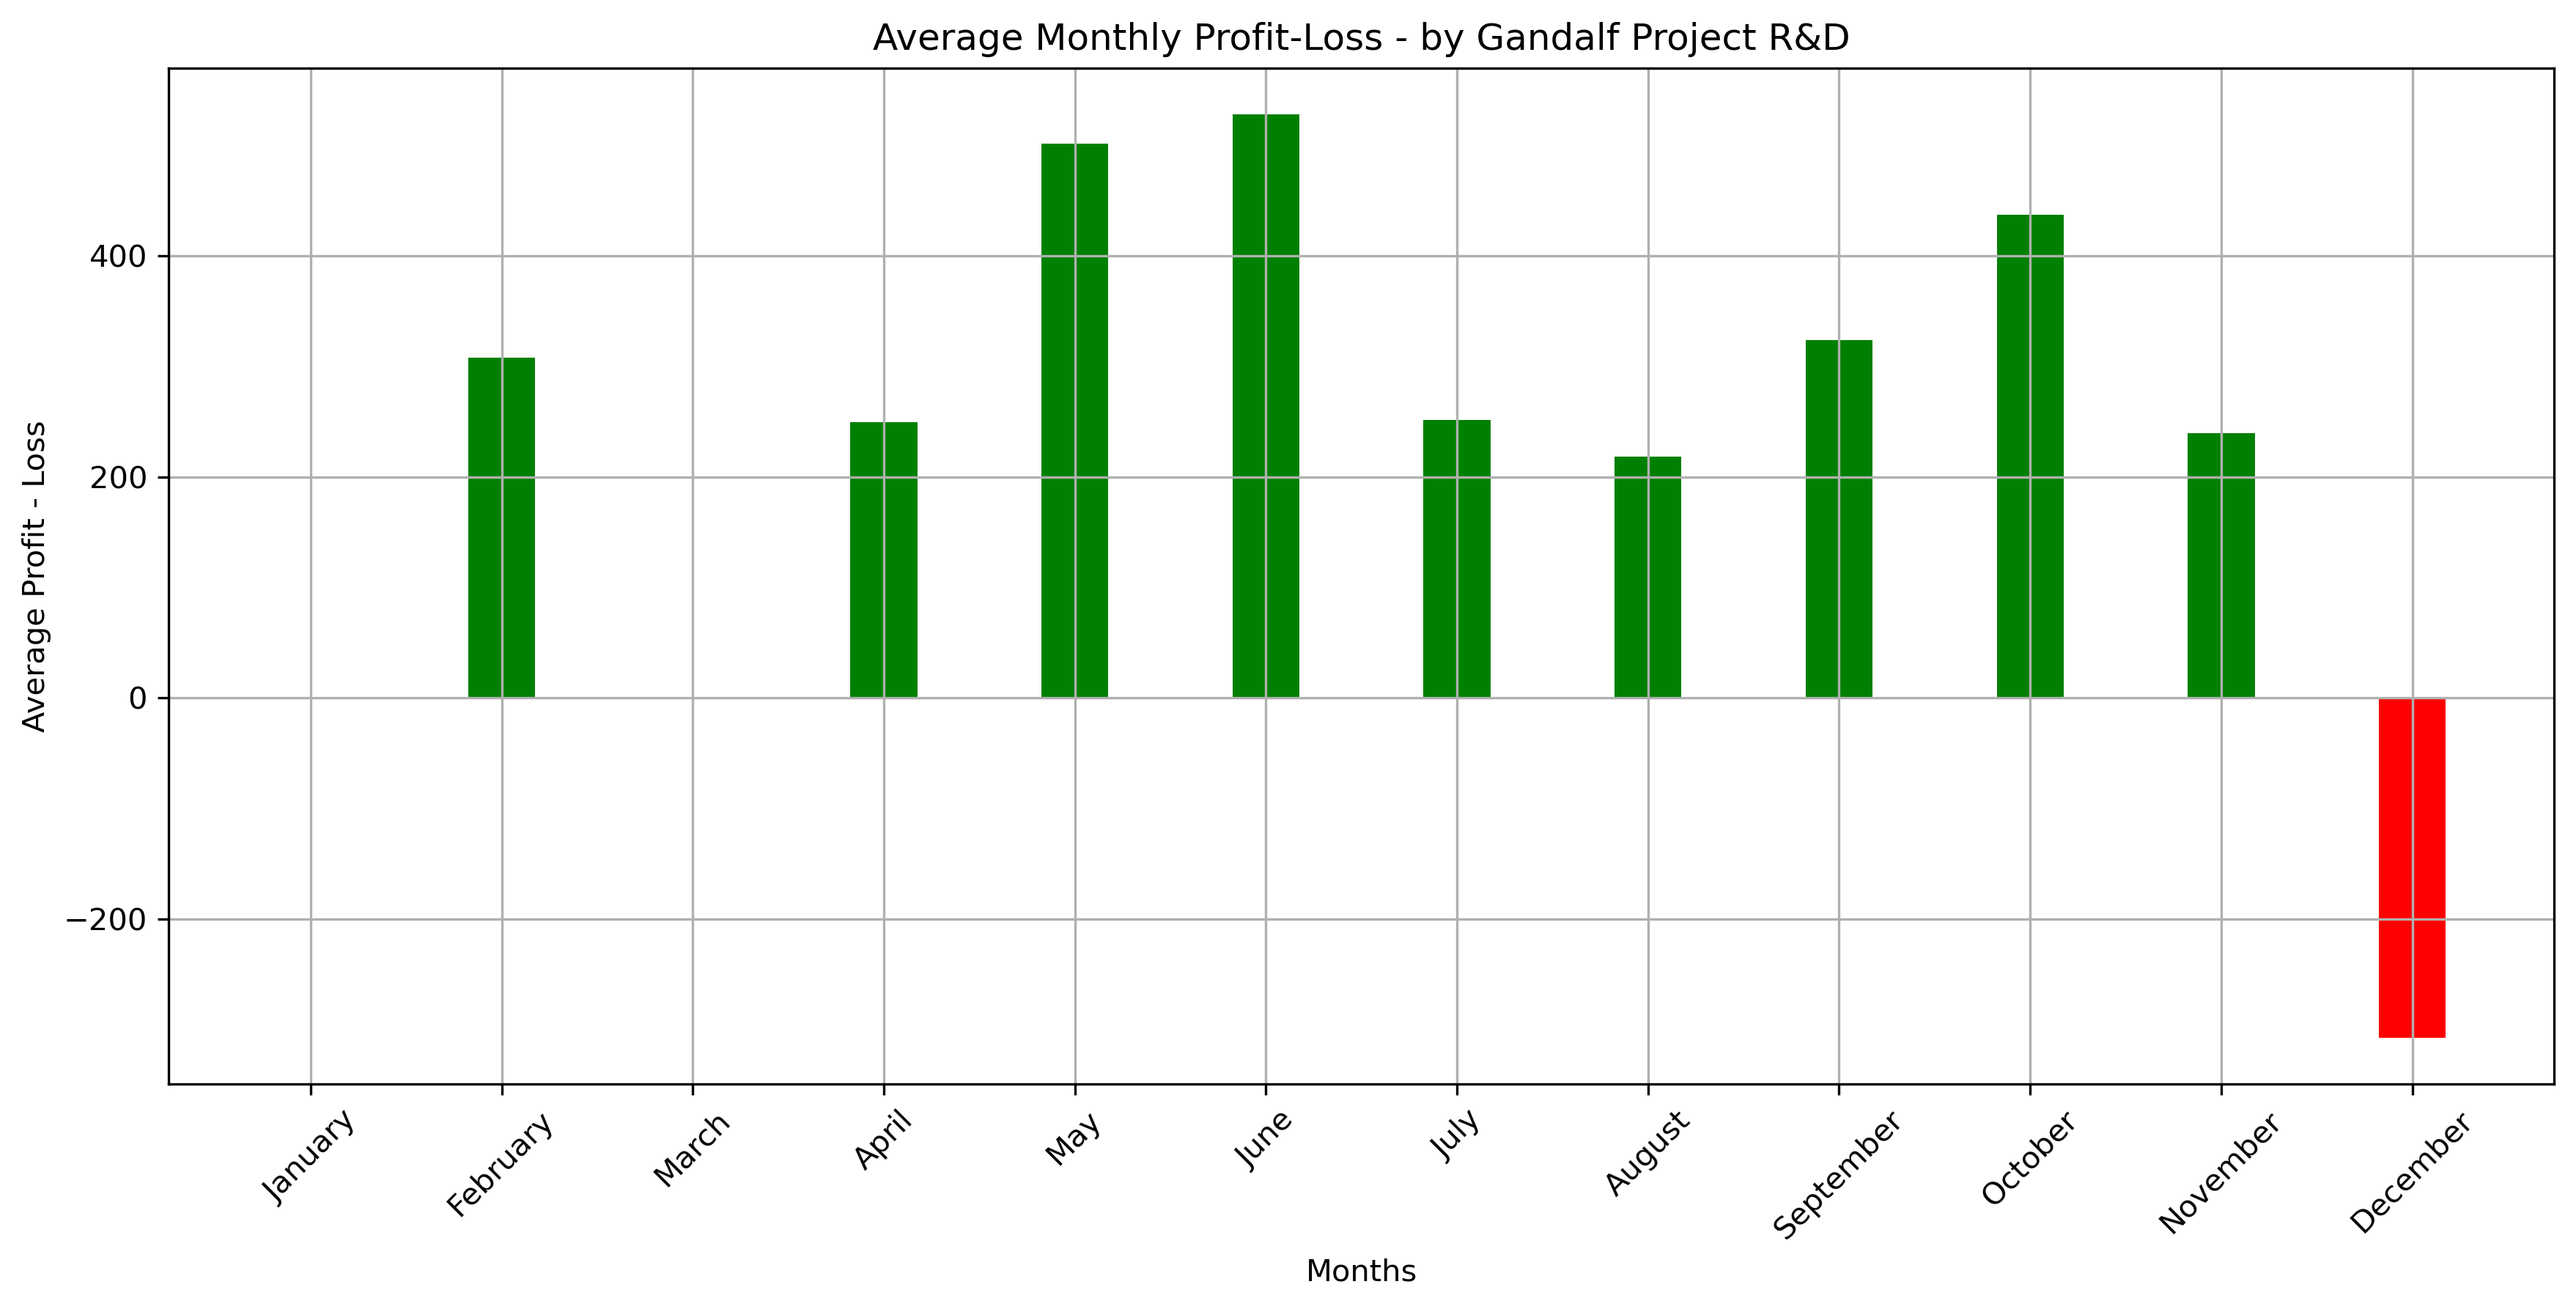

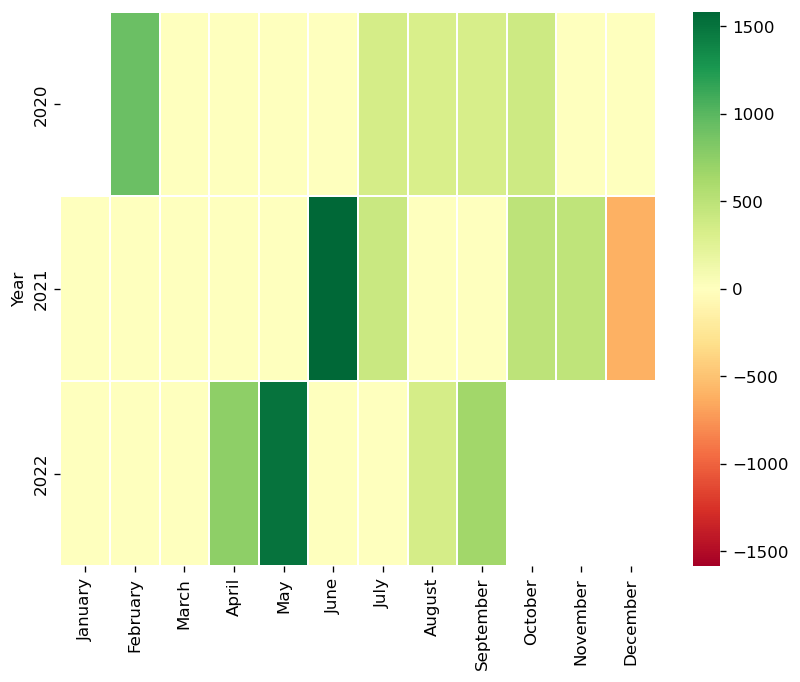

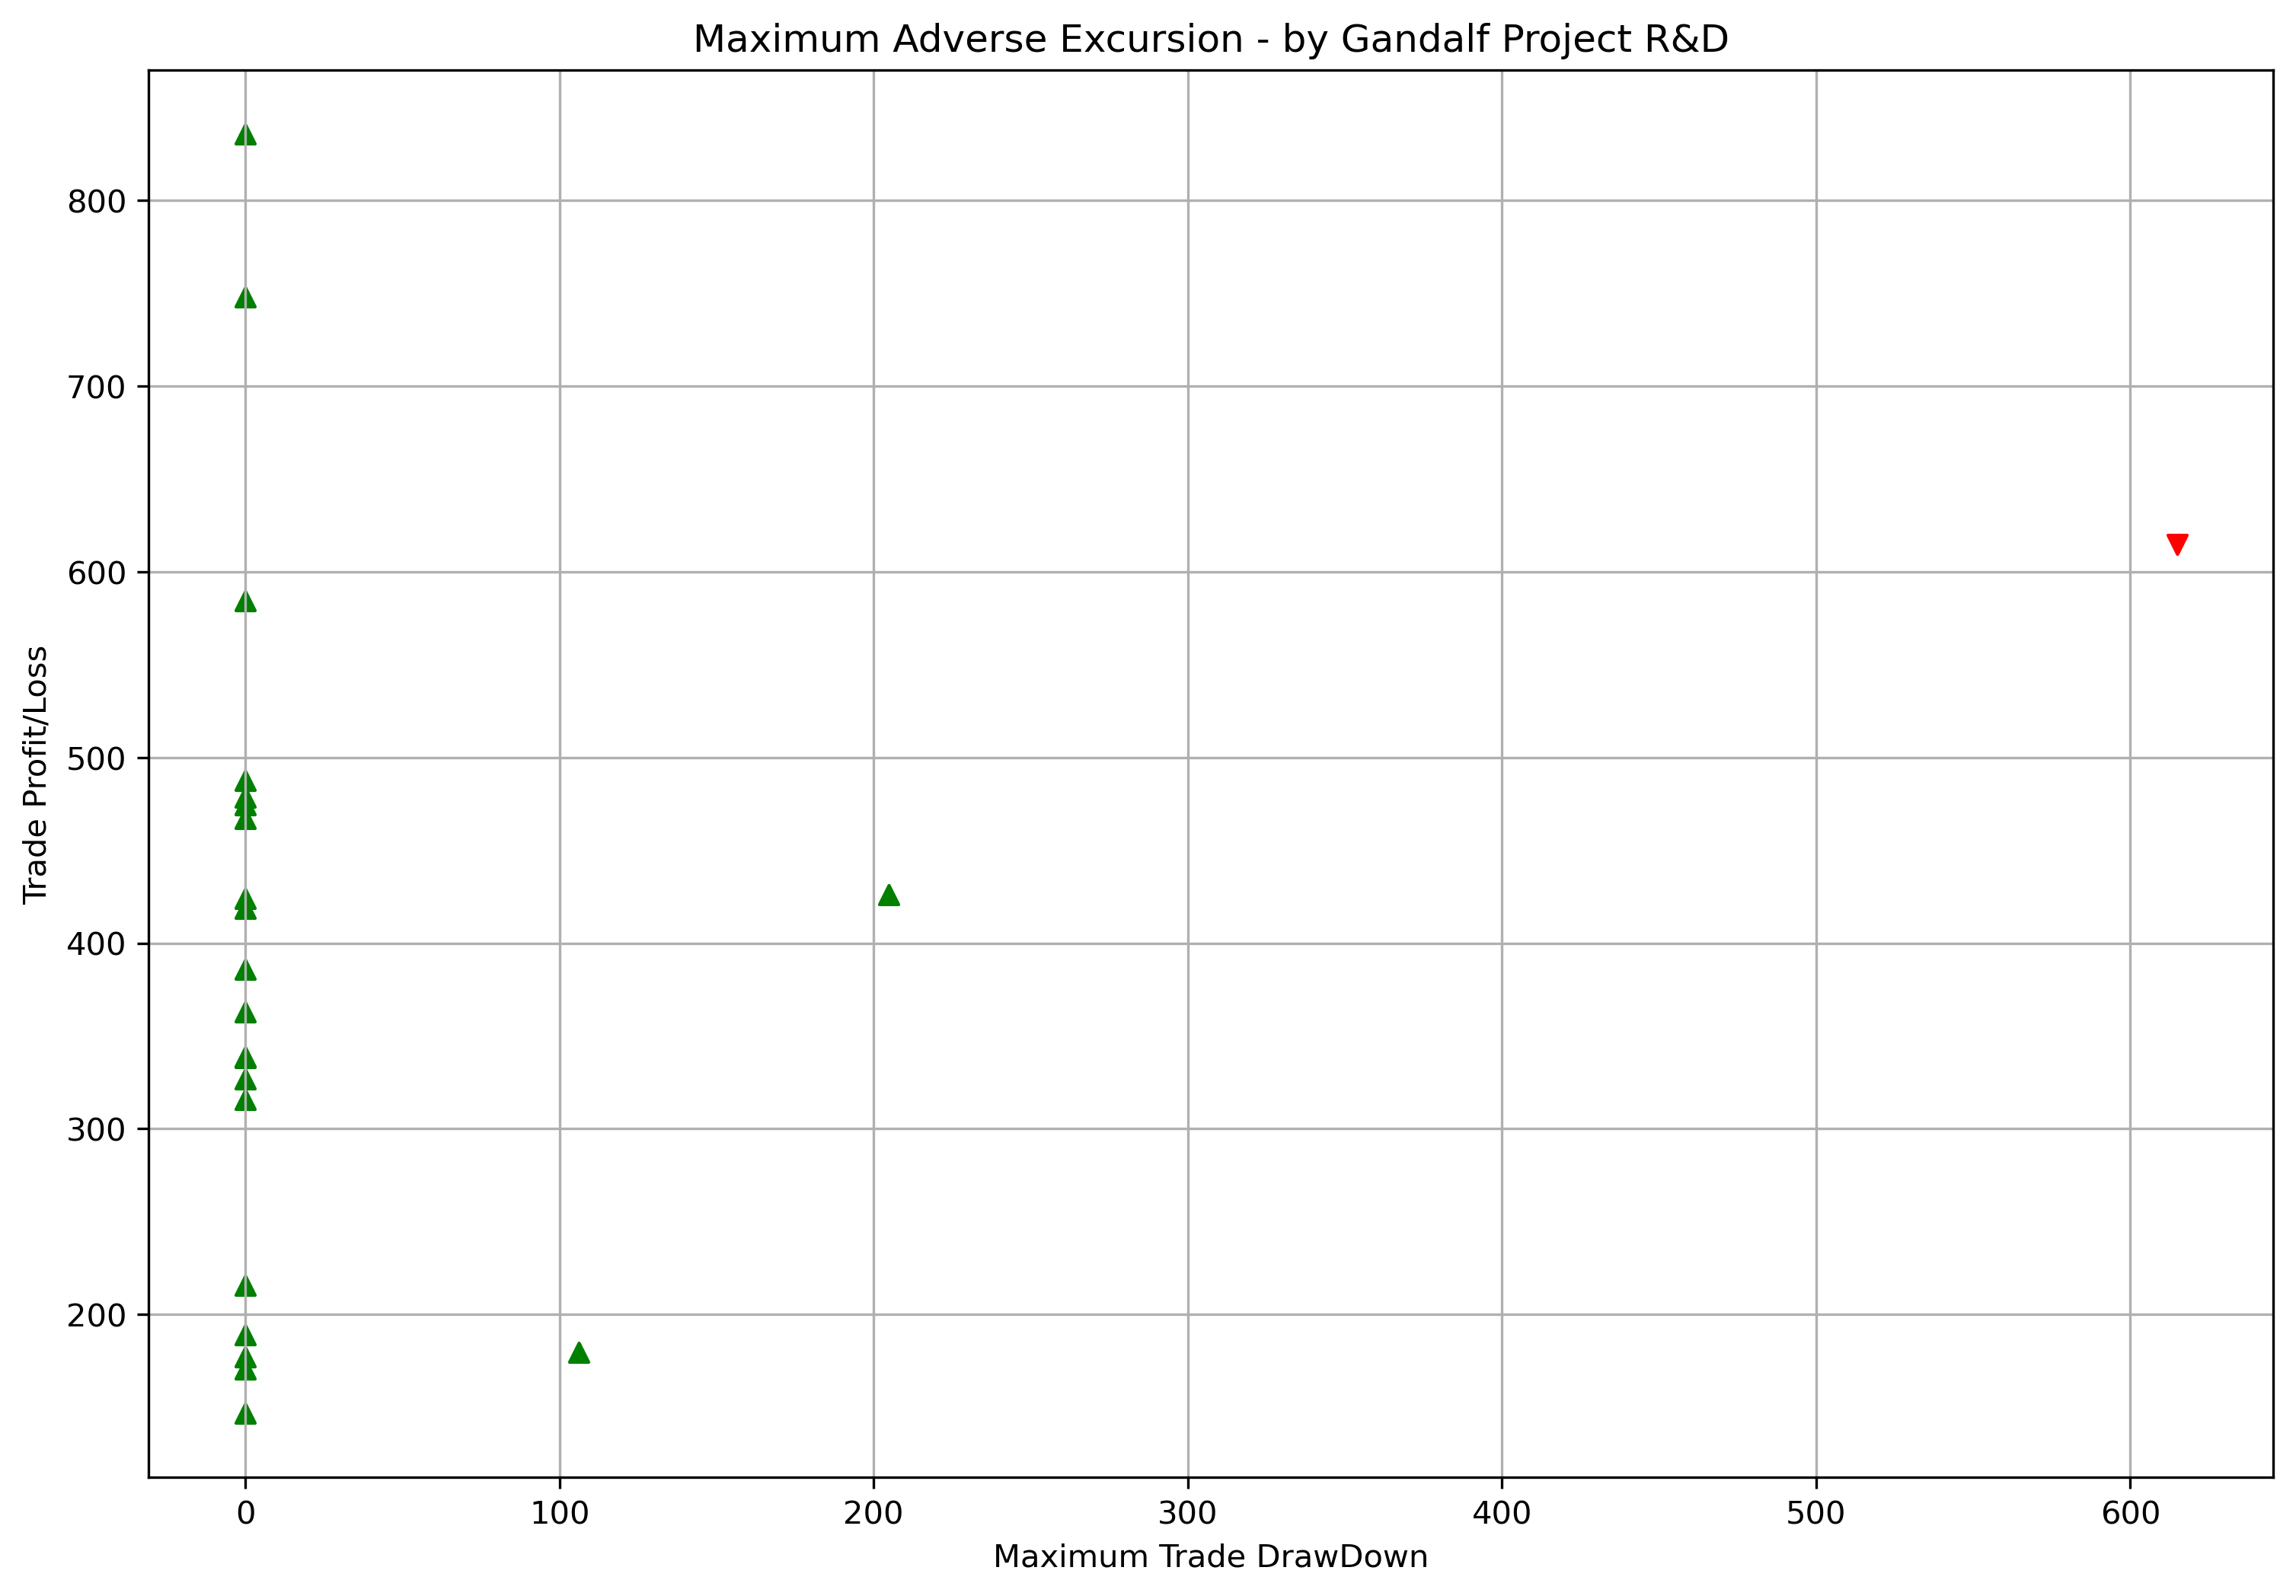

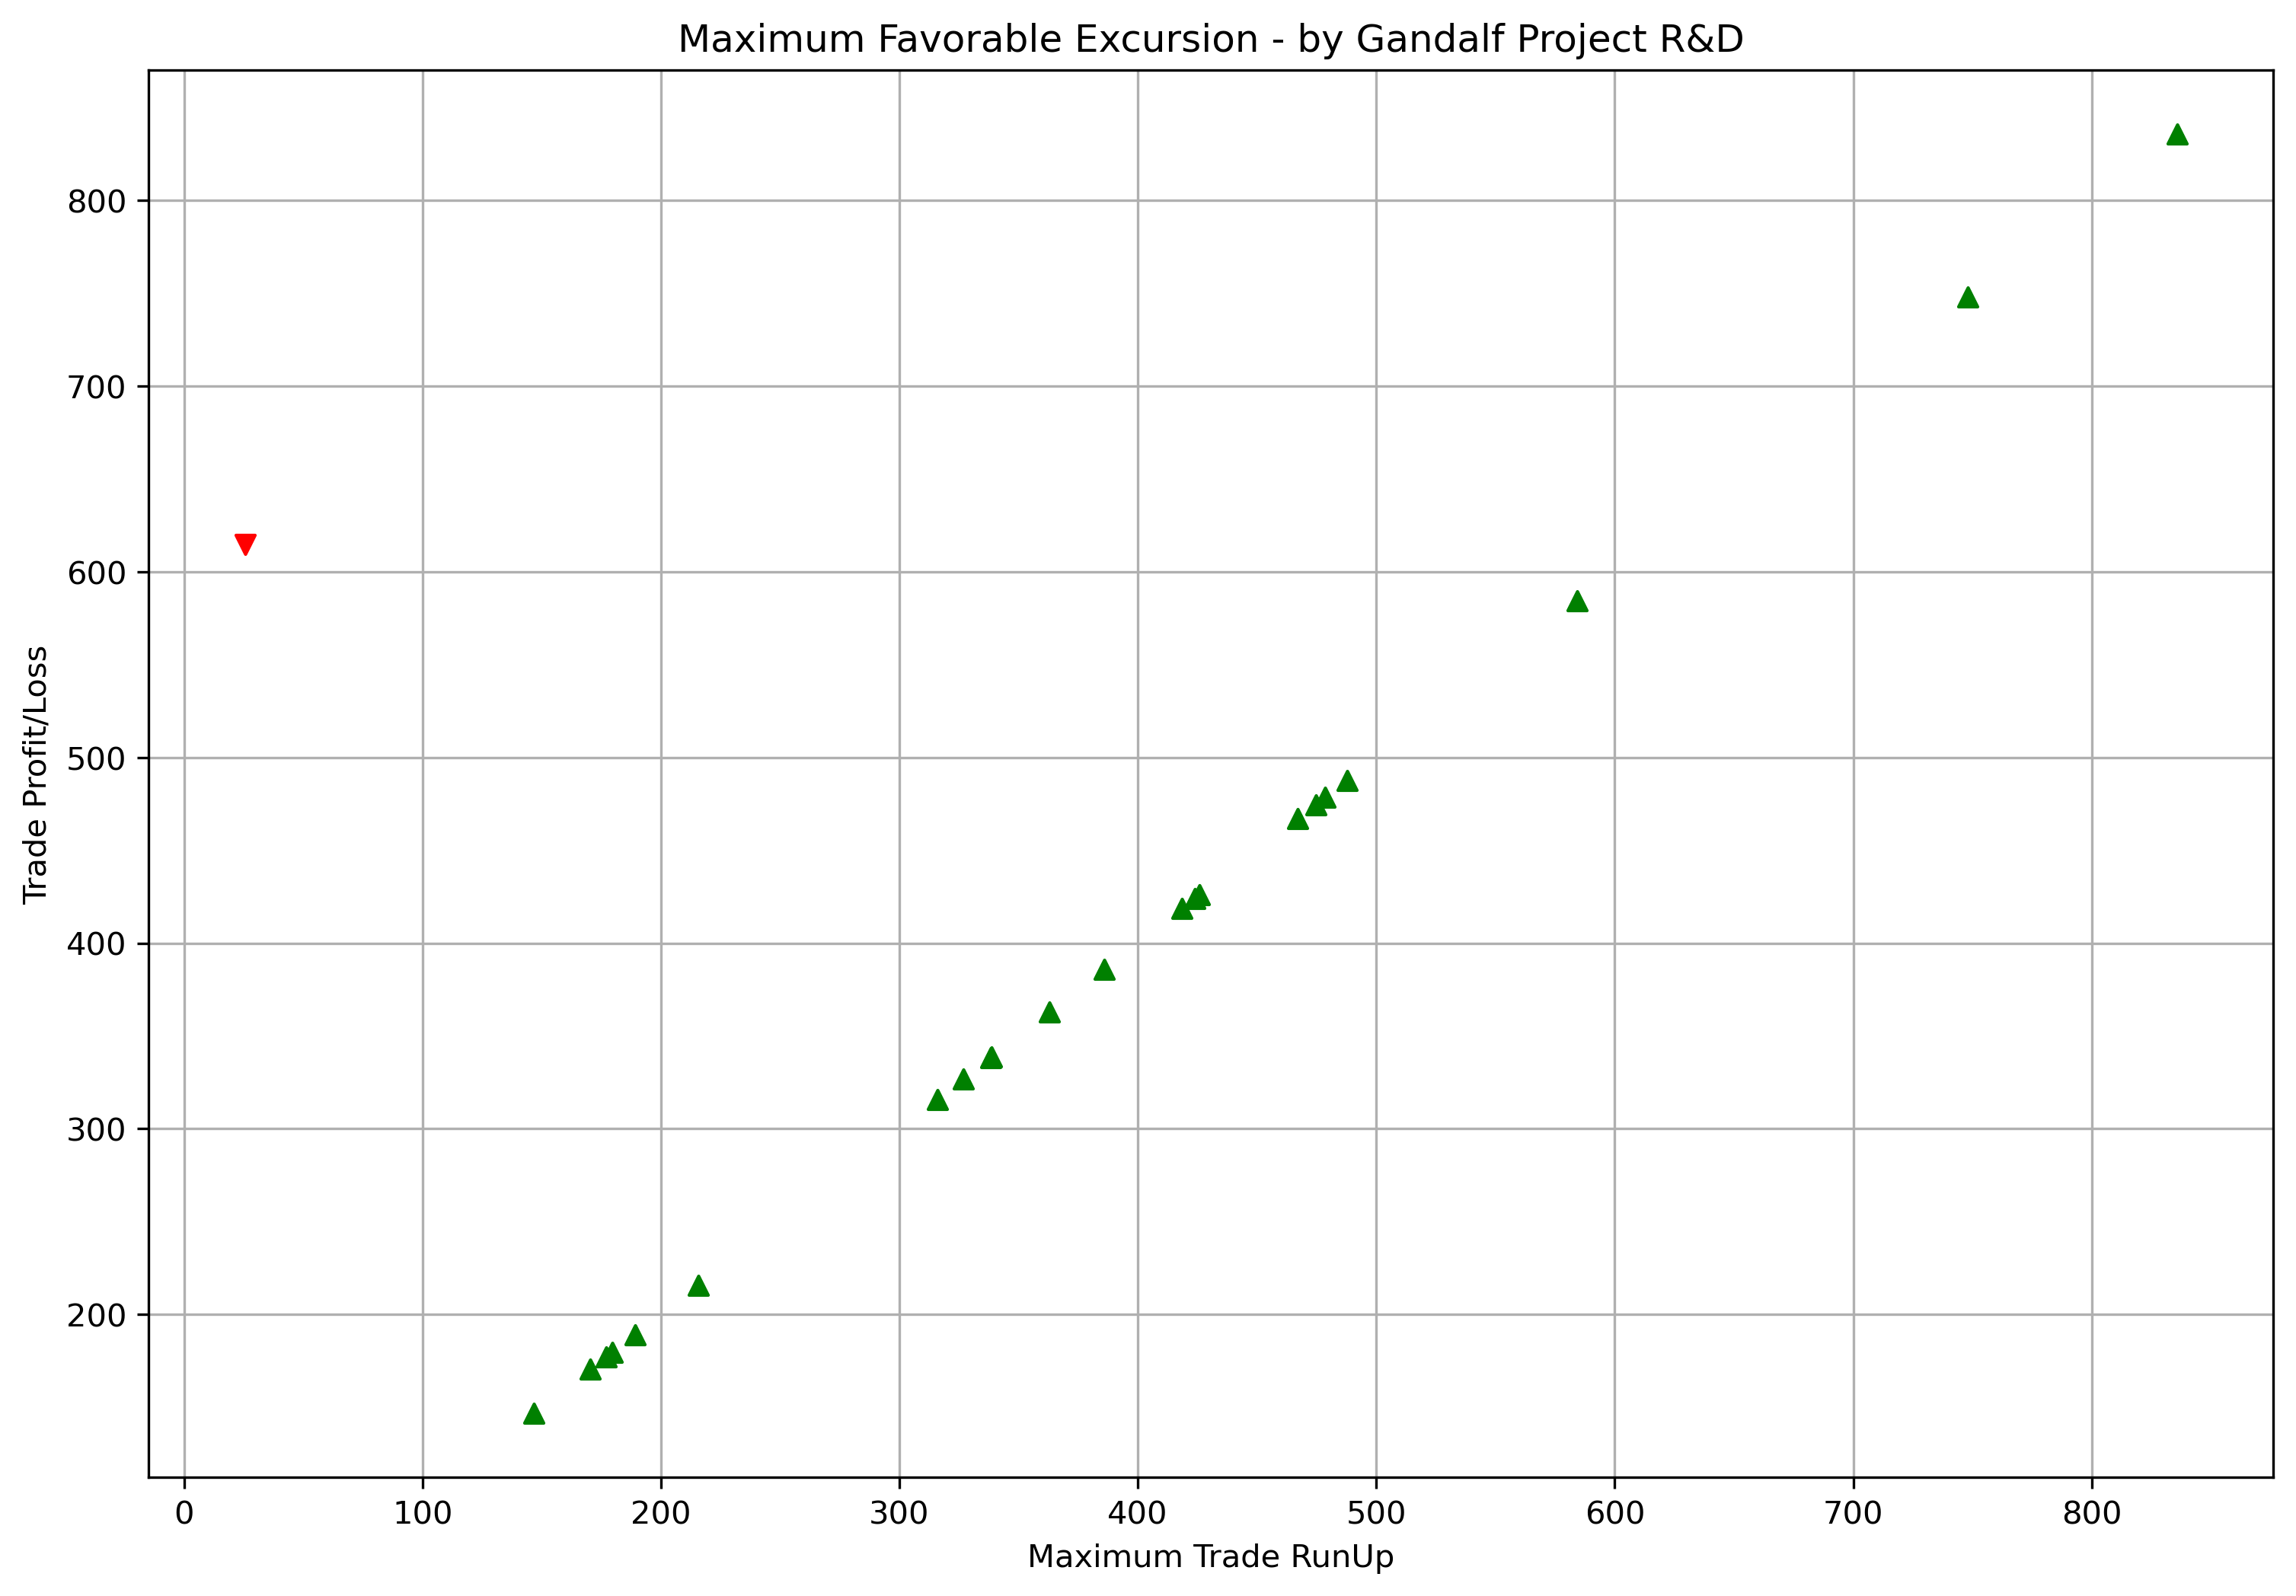

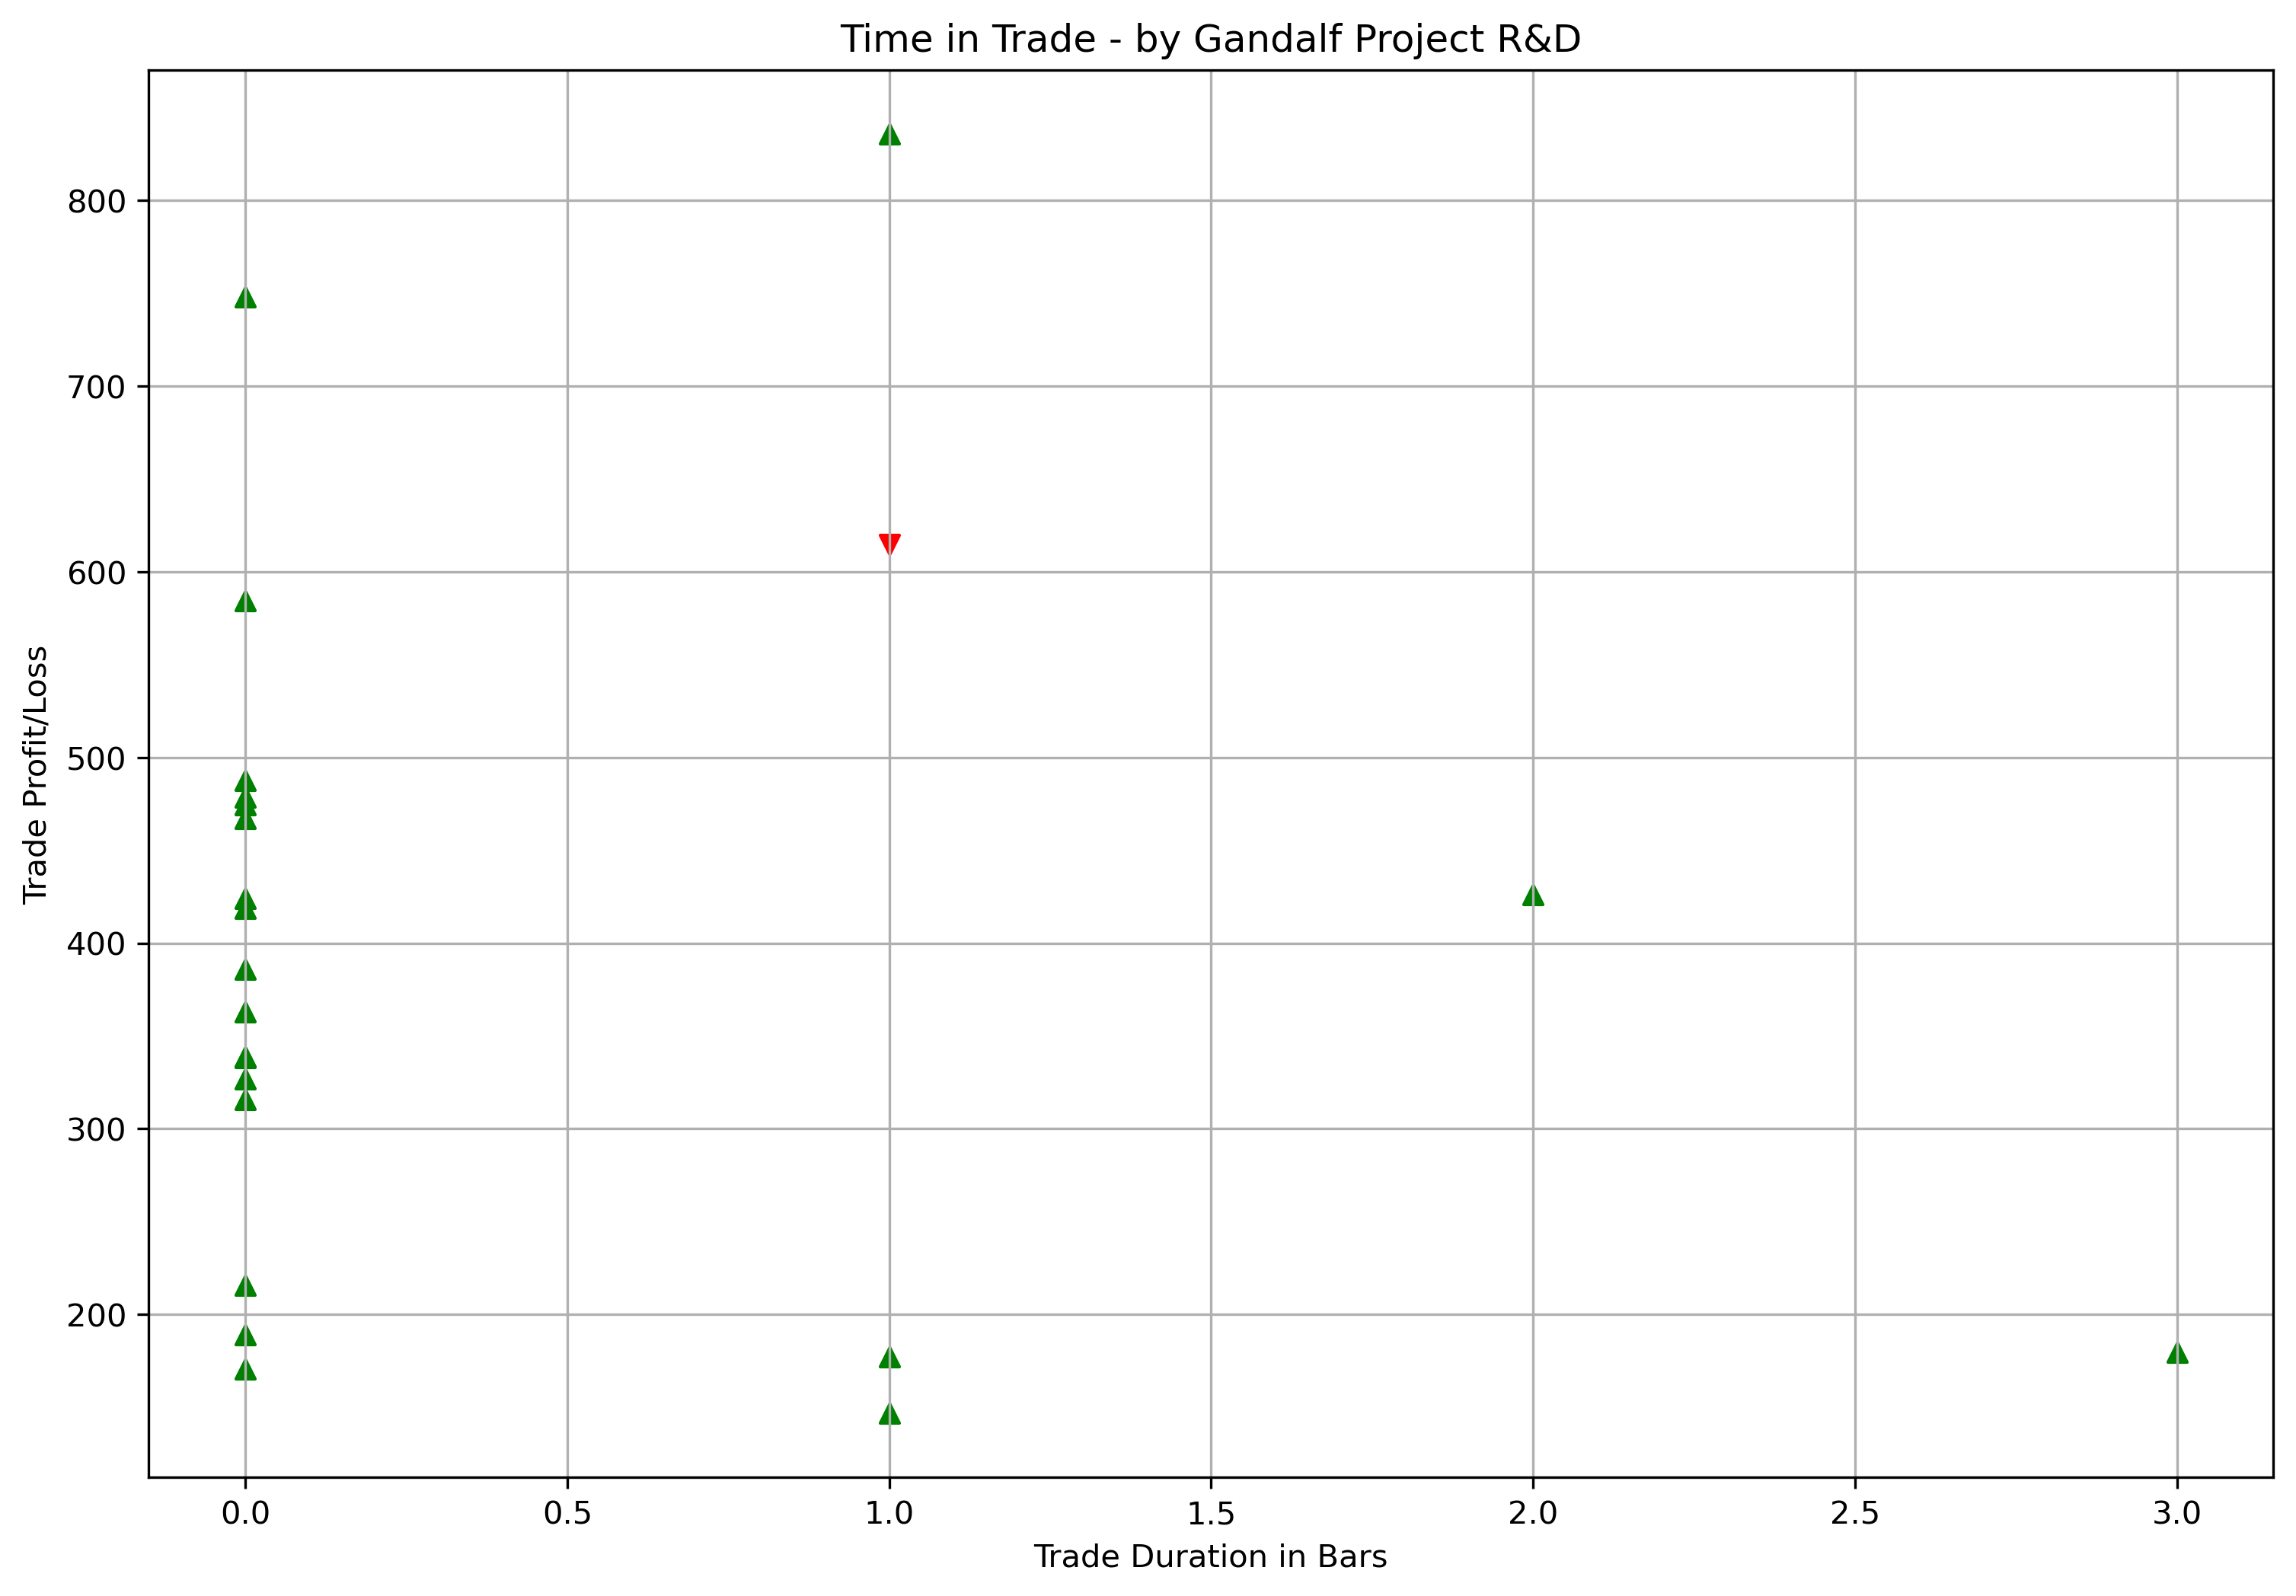

In [97]:
WRITELOG = False

NAME = "Btc_Williams_mean_lows_highs"
EXIT_ON_ENTRY_BAR = True
CONSECUTIVE_TRADES = True

COSTS_FIXED = 0
# 10 for 10 $ for each transaction (2 * fee each operation)
COSTS_VARIABLE = 0.075
# 1.0 for 1% (2 * fee each operation)
COSTS_PERSHARES = 0.0 
# 0.01 for 1 cent for each shares traded (2 * fee each operation)

INSTRUMENT = 3 # 1: equity, 2: future, 3: crypto/forex
TICK = 0.1
BIGPOINTVALUE = 1
DIRECTION = "long"
ORDER_TYPE = "limit"

QUANTITY = 10000
MARGIN_PERCENT = 20 # margin to use in capital calculation

MAX_INTRADAY_OPERATIONS = 1

TIME_EXIT = 0  # 0 to disable
TIME_EXIT_LOSS = 0  # 0 to disable
TIME_EXIT_GAIN = 0  # 0 to disable

MONEY_STOPLOSS = 600  # 0 to disable
MONEY_TARGET = 0  # 0 to disable

MIN_MONEY_PERCENT_STOPLOSS = 0
PERCENT_STOPLOSS = 0.0  # 0 to disable

MIN_MONEY_PERCENT_TARGET = 0
PERCENT_TARGET = 0  # 0 to disable


enter_level = df.low_media.shift(1)


rule_1 = (df.open > df.low_media.shift(1))
rule_2 = True

rule_3 = df.close > df.daily_close_sma.shift(1)

rule_4 = True #df.close.shift(1) >= df.daily_close_sma.shift(2)
rule_5 = df.daily_close_sma.shift(1) < df.daily_close_sma.shift(2)

enter_rules = rule_1 & rule_2 & rule_3 & rule_4 & rule_5


exit_rules = False

exit_rules_loss = False 

exit_rules_gain = False 


target_level = df.high_media.shift(1)


stop_level = False #df.close.rolling(std_mean).mean() - 10.0 * df.close.rolling(std_mean).std() 
#stop_level=0



tradelist, open_equity, closed_equity, operation_equity = apply_trading_system(df, INSTRUMENT, QUANTITY, MARGIN_PERCENT, BIGPOINTVALUE, TICK, DIRECTION,
                                                                               COSTS_FIXED, COSTS_VARIABLE, COSTS_PERSHARES, 
                                                                               ORDER_TYPE, enter_level, enter_rules, MAX_INTRADAY_OPERATIONS, 
                                                                               exit_rules, exit_rules_loss, exit_rules_gain,
                                                                               target_level, stop_level,
                                                                               TIME_EXIT, TIME_EXIT_LOSS, TIME_EXIT_GAIN, 
                                                                               MONEY_STOPLOSS, MONEY_TARGET, 
                                                                               PERCENT_STOPLOSS, MIN_MONEY_PERCENT_STOPLOSS, 
                                                                               PERCENT_TARGET, MIN_MONEY_PERCENT_TARGET, WRITELOG, EXIT_ON_ENTRY_BAR, CONSECUTIVE_TRADES)

# True: Interactive, False: Static
performance_report(df, tradelist, closed_equity, open_equity, 10000, 0, MARGIN_PERCENT, False)


In [83]:
tradelist

,id,entry_date,entry_label,quantity,entry_price,exit_date,exit_label,exit_price,bars_in_trade,mae,mfe,operations,capital,costs
2020-02-26 01:00:00,1,2020-02-25 01:00:00,entry_long_limit,1.035612,9559.50,2020-02-26 01:00:00,money_stoploss_long,8980.130000,1.0,-614.47,0.00,-614.47,9899.928853,-14.471388
2020-03-08 01:00:00,2,2020-03-08 01:00:00,entry_long_limit,1.125282,8855.60,2020-03-08 01:00:00,money_stoploss_entrybar_long,8322.400000,0.0,-615.00,0.00,-615.00,9965.048736,-15.000000
2020-03-23 01:00:00,3,2020-03-23 01:00:00,entry_long_limit,1.719339,5754.60,2020-03-23 01:00:00,target_level_entrybar_long,6588.283333,0.0,0.00,1418.38,1418.38,9894.105935,-15.000000
2020-04-22 02:00:00,4,2020-04-20 02:00:00,entry_long_limit,1.404348,7014.30,2020-04-22 02:00:00,time_exit_rules_loss_long,6841.360000,2.0,-263.27,0.00,-257.28,9850.521154,-14.411501
2020-05-22 02:00:00,5,2020-05-20 02:00:00,entry_long_limit,1.022962,9420.10,2020-05-22 02:00:00,time_exit_rules_loss_long,9067.510000,2.0,-374.60,93.43,-374.60,9636.408461,-13.915332
2020-08-24 02:00:00,6,2020-08-22 02:00:00,entry_long_limit,0.867202,11531.23,2020-08-24 02:00:00,target_level_long,11760.690000,2.0,0.00,183.84,183.84,9999.904608,-15.151921
2020-09-14 02:00:00,7,2020-09-14 02:00:00,entry_long_limit,0.967789,10223.00,2020-09-14 02:00:00,target_level_entrybar_long,10485.226667,0.0,0.00,238.78,238.78,9893.707726,-15.000000
2020-10-01 02:00:00,8,2020-10-01 02:00:00,entry_long_limit,0.927937,10642.30,2020-10-01 02:00:00,target_level_entrybar_long,10888.960000,0.0,0.00,213.89,213.89,9875.387298,-15.000000
2021-02-02 01:00:00,9,2021-02-01 01:00:00,entry_long_limit,0.302179,32304.00,2021-02-02 01:00:00,target_level_long,34664.320000,1.0,0.00,698.04,698.04,9761.586898,-15.196442
2021-03-07 01:00:00,10,2021-03-05 01:00:00,entry_long_limit,0.206722,47549.40,2021-03-07 01:00:00,target_level_long,50140.936667,2.0,0.00,520.57,520.57,9829.518240,-15.157556
